In [4429]:

import importlib
import data_prep as dp
import macro_utils
import pandas as pd
importlib.reload(dp) 
importlib.reload(macro_utils)
print(dir(dp))  # Check if functions appear now
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import numpy as np

Device set to use mps:0


['RESTClient', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calculate_sentiment', 'calculate_sentiment_stats', 'datetime', 'download_vix_data', 'load_data', 'load_dotenv', 'load_macro_df', 'macro_analysis', 'merge_dataframes', 'micro_analysis', 'np', 'os', 'pd', 'pipe', 'pipeline', 're', 'sort_by_date', 'time', 'tqdm', 'yf']


In [561]:
#optional
#df = dp.macro_analysis('./../clean_macro_5y_news_1kcap.csv', 'description', 'title')

In [4113]:
import os
from dotenv import load_dotenv

load_dotenv()
vix_api_key = os.getenv("POLYGON_API_KEY")
print(vix_api_key)

4D7bOtT85J0bWiaW_0tfehwPhXlcibo4


# OPTIONAL: concat recent news with existing df for trading.

In [5192]:
df_live_temp = dp.macro_analysis('./../clean_macro_05-26-25_news.csv', 'description', 'title', vix_api_key)

Step 1: Loading data
Available columns in CSV: ['topic', 'title', 'description', 'source', 'published_at', 'url']
Columns after loading: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date']
Data shape after loading: (5249, 7)
Step 2: Sorting by date
Min date: 2025-05-23 00:00:00, Max date: 2025-05-26 00:00:00
Columns after sorting: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date']
Step 3: Calculating summary sentiment
Analyzing sentiment for 5249 entries in column 'description'...


Sentiment analysis for 'description': 100%|██████████| 5249/5249 [01:10<00:00, 74.37it/s] 


Columns after summary sentiment: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date', 'description_sentiment_summary', 'description_sentiment_label_summary']
Step 4: Calculating headline sentiment
Analyzing sentiment for 5249 entries in column 'title'...


Sentiment analysis for 'title': 100%|██████████| 5249/5249 [01:01<00:00, 85.56it/s] 


Columns after headline sentiment: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date', 'description_sentiment_summary', 'description_sentiment_label_summary', 'title_sentiment_headline', 'title_sentiment_label_headline']
Step 5: Calculating sentiment stats
Inside calculate_sentiment_stats
Input df shape: (5249, 11)
Input columns: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date', 'description_sentiment_summary', 'description_sentiment_label_summary', 'title_sentiment_headline', 'title_sentiment_label_headline']
Date min: 2025-05-23 00:00:00, max: 2025-05-26 00:00:00
Filtered df shape: (5249, 11)
Looking for columns: description_sentiment_summary and title_sentiment_headline
Output columns: ['date', 'summary_mean', 'summary_min', 'summary_max', 'summary_pos_count', 'summary_neg_count', 'headline_mean', 'headline_min', 'headline_max', 'headline_pos_count', 'headline_neg_count', 'overall_mean', 'overall_min', 'overall_max', 'overall_pos_count'

In [5193]:
df_live_temp

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_max,overall_pos_count,overall_neg_count,vix_target,vix_high
0,2025-05-23,-0.208646,-0.975558,0.957297,1055,785,-0.184065,-0.975558,0.954731,1121,719,-0.196355,-0.975558,0.956014,2176,1504,22.29,25.53
1,2025-05-24,-0.089830,-0.976344,0.954025,739,416,-0.033403,-0.972314,0.952723,862,293,-0.061617,-0.974329,0.953374,1601,709,20.57,20.83
2,2025-05-25,-0.106395,-0.976097,0.957245,629,386,-0.100675,-0.973344,0.951967,691,324,-0.103535,-0.974720,0.954606,1320,710,20.57,20.83
3,2025-05-26,-0.031297,-0.975983,0.955655,858,381,0.009323,-0.971425,0.949330,931,308,-0.010987,-0.973704,0.952493,1789,689,20.57,20.83


In [5194]:
vix_high = df_live_temp['vix_high']
df_live_temp = df_live_temp.drop(columns=['vix_high'])

In [5195]:
print((df_live_temp['vix_target']))

0    22.29
1    20.57
2    20.57
3    20.57
Name: vix_target, dtype: float64


In [5196]:
df_live = df_live_temp.copy()
df_live.index = pd.to_datetime(df_live['date'])
df_live['vix_target'] = np.log(df_live['vix_target'])

In [5197]:
df_live.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_max,overall_pos_count,overall_neg_count,vix_target
date,,,,,,,,,,,,,,,,,
2025-05-23,2025-05-23,-0.208646,-0.975558,0.957297,1055,785,-0.184065,-0.975558,0.954731,1121,719,-0.196355,-0.975558,0.956014,2176,1504,3.104138
2025-05-24,2025-05-24,-0.089830,-0.976344,0.954025,739,416,-0.033403,-0.972314,0.952723,862,293,-0.061617,-0.974329,0.953374,1601,709,3.023834
2025-05-25,2025-05-25,-0.106395,-0.976097,0.957245,629,386,-0.100675,-0.973344,0.951967,691,324,-0.103535,-0.974720,0.954606,1320,710,3.023834
2025-05-26,2025-05-26,-0.031297,-0.975983,0.955655,858,381,0.009323,-0.971425,0.949330,931,308,-0.010987,-0.973704,0.952493,1789,689,3.023834


In [4989]:
#df = pd.read_csv('./../data/Sentiment Macro 7Y News 2.5K Cap.csv') #adjust for live/most recent df news under /data/live
df = pd.read_csv('./../data/live/7y_up_to_05-21-25_news.csv')


In [5198]:
df

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat
date,,,,,,,,,,,,,,,,,,,,,
2017-12-13,0.086767,0.086767,0,-0.533592,-0.533592,0,2,-0.223413,-0.223413,2,...,NaN,NaN,2.320425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-14,0.091055,0.091055,0,0.091055,0.091055,1255,0,0.091055,0.091055,2510,...,NaN,NaN,2.335924,0.021211,0.683537,2.320425,2.320425,2.320425,NaN,NaN
2017-12-26,0.090923,0.090923,0,0.090923,0.090923,1,0,0.090923,0.090923,2,...,NaN,NaN,2.332847,0.015595,-0.357155,2.335424,2.335424,2.328174,0.010606,0.683537
2017-12-27,0.505010,0.060151,0,0.086224,0.082667,2,0,0.295617,0.071409,4,...,NaN,NaN,2.337164,0.014904,0.761551,2.332708,2.332708,2.329788,0.007839,0.372623
2018-01-02,0.065905,0.065905,0,0.085878,0.085878,1,0,0.075892,0.075892,2,...,NaN,NaN,2.324002,0.029962,-1.491411,2.336660,2.336660,2.331681,0.007223,0.689259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19,-0.168849,-0.975605,394,-0.177145,-0.974373,590,377,-0.172997,-0.974989,1163,...,-0.095114,-1.222769,3.098307,0.238405,-0.839695,3.180501,3.180501,3.300409,0.125393,-0.956257
2025-05-20,-0.094376,-0.976516,510,-0.044465,-0.974235,968,380,-0.069420,-0.975375,1806,...,-0.072441,-1.154612,3.085214,0.236097,-0.804138,3.160921,3.160921,3.291410,0.126190,-1.034074
2025-05-21,-0.122948,-0.976831,691,-0.090389,-0.974726,1283,593,-0.106669,-0.975778,2468,...,-0.039402,-0.440580,3.082188,0.228654,-0.191883,3.144451,3.144451,3.281929,0.127455,-1.078638


In [4991]:
df.index = pd.to_datetime(df['date'])
#df = df.drop(columns=['date'])

In [4913]:
np.exp(df['vix_target'].tail())

date
2025-05-17    19.52
2025-05-18    19.52
2025-05-19    18.14
2025-05-20    18.09
2025-05-21    20.87
Name: vix_target, dtype: float64

In [5199]:
df_live.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_max,overall_pos_count,overall_neg_count,vix_target
date,,,,,,,,,,,,,,,,,
2025-05-23,2025-05-23,-0.208646,-0.975558,0.957297,1055,785,-0.184065,-0.975558,0.954731,1121,719,-0.196355,-0.975558,0.956014,2176,1504,3.104138
2025-05-24,2025-05-24,-0.089830,-0.976344,0.954025,739,416,-0.033403,-0.972314,0.952723,862,293,-0.061617,-0.974329,0.953374,1601,709,3.023834
2025-05-25,2025-05-25,-0.106395,-0.976097,0.957245,629,386,-0.100675,-0.973344,0.951967,691,324,-0.103535,-0.974720,0.954606,1320,710,3.023834
2025-05-26,2025-05-26,-0.031297,-0.975983,0.955655,858,381,0.009323,-0.971425,0.949330,931,308,-0.010987,-0.973704,0.952493,1789,689,3.023834


In [5200]:
df_live = macro_utils.calculate_stats(df_live, threshold_abs=9, window=30, window_prev=30)


In [5202]:
# Ensure 'date' columns are datetime
df['date'] = pd.to_datetime(df.index)
df_live['date'] = pd.to_datetime(df_live.index)

# Remove overlap: drop April 10 from df_live if it exists in df
#df_live_trimmed = df_live_trimmed[df.columns]




In [5203]:
df_live

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,...,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat
date,,,,,,,,,,,,,,,,,,,,,
2025-05-23,2025-05-23,-0.208646,-0.975558,0.957297,1055,785,-0.184065,-0.975558,0.954731,1121,...,NaN,NaN,3.104138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-24,2025-05-24,-0.089830,-0.976344,0.954025,739,416,-0.033403,-0.972314,0.952723,862,...,NaN,NaN,3.062648,0.056784,-0.683537,3.104138,3.104138,3.104138,NaN,NaN
2025-05-25,2025-05-25,-0.106395,-0.976097,0.957245,629,386,-0.100675,-0.973344,0.951967,691,...,NaN,NaN,3.048838,0.045576,-0.548623,3.063986,3.063986,3.083393,0.028392,-0.683537
2025-05-26,2025-05-26,-0.031297,-0.975983,0.955655,858,381,0.009323,-0.971425,0.949330,931,...,NaN,NaN,3.041948,0.038792,-0.466963,3.050602,3.050602,3.071726,0.027565,-0.766333


In [5112]:
## TRADE ONLY, FOR UPDATING A DAY;S DATA
df_updated = df[~df['date'].isin(df_live['date'])]

df = pd.concat([df_updated, df_live], ignore_index=True)

df = df.sort_values('date').reset_index(drop=True)


In [5113]:
df

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,date,summary_max,summary_pos_count,headline_max,overall_max,shock_pos
0,0.086767,0.086767,0,-0.533592,-0.533592,0,2,-0.223413,-0.223413,2,...,NaN,NaN,NaN,NaN,2017-12-13,NaN,NaN,NaN,NaN,NaN
1,0.091055,0.091055,0,0.091055,0.091055,1255,0,0.091055,0.091055,2510,...,2.320425,2.320425,NaN,NaN,2017-12-14,NaN,NaN,NaN,NaN,NaN
2,0.090923,0.090923,0,0.090923,0.090923,1,0,0.090923,0.090923,2,...,2.335424,2.328174,0.010606,0.683537,2017-12-26,NaN,NaN,NaN,NaN,NaN
3,0.505010,0.060151,0,0.086224,0.082667,2,0,0.295617,0.071409,4,...,2.332708,2.329788,0.007839,0.372623,2017-12-27,NaN,NaN,NaN,NaN,NaN
4,0.065905,0.065905,0,0.085878,0.085878,1,0,0.075892,0.075892,2,...,2.336660,2.331681,0.007223,0.689259,2018-01-02,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,-0.168849,-0.975605,394,-0.177145,-0.974373,590,377,-0.172997,-0.974989,1163,...,3.180501,3.300409,0.125393,-0.956257,2025-05-19,NaN,NaN,NaN,NaN,NaN
1934,-0.094376,-0.976516,510,-0.044465,-0.974235,968,380,-0.069420,-0.975375,1806,...,3.160921,3.291410,0.126190,-1.034074,2025-05-20,NaN,NaN,NaN,NaN,NaN
1935,-0.122948,-0.976831,691,-0.090389,-0.974726,1283,593,-0.106669,-0.975778,2468,...,3.144451,3.281929,0.127455,-1.078638,2025-05-21,NaN,NaN,NaN,NaN,NaN
1936,-0.152035,-0.976194,850,-0.142184,-0.975201,1358,786,-0.147109,-0.975698,2652,...,NaN,NaN,NaN,NaN,2025-05-22,0.955348,1294.0,0.955348,0.955348,0.955348


In [5114]:
df.index = pd.to_datetime(df['date'])
df = df.drop(columns=['date'])

In [5115]:
df

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,summary_max,summary_pos_count,headline_max,overall_max,shock_pos
date,,,,,,,,,,,,,,,,,,,,,
2017-12-13,0.086767,0.086767,0,-0.533592,-0.533592,0,2,-0.223413,-0.223413,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-14,0.091055,0.091055,0,0.091055,0.091055,1255,0,0.091055,0.091055,2510,...,2.320425,2.320425,2.320425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,0.090923,0.090923,0,0.090923,0.090923,1,0,0.090923,0.090923,2,...,2.335424,2.335424,2.328174,0.010606,0.683537,NaN,NaN,NaN,NaN,NaN
2017-12-27,0.505010,0.060151,0,0.086224,0.082667,2,0,0.295617,0.071409,4,...,2.332708,2.332708,2.329788,0.007839,0.372623,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.065905,0.065905,0,0.085878,0.085878,1,0,0.075892,0.075892,2,...,2.336660,2.336660,2.331681,0.007223,0.689259,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19,-0.168849,-0.975605,394,-0.177145,-0.974373,590,377,-0.172997,-0.974989,1163,...,3.180501,3.180501,3.300409,0.125393,-0.956257,NaN,NaN,NaN,NaN,NaN
2025-05-20,-0.094376,-0.976516,510,-0.044465,-0.974235,968,380,-0.069420,-0.975375,1806,...,3.160921,3.160921,3.291410,0.126190,-1.034074,NaN,NaN,NaN,NaN,NaN
2025-05-21,-0.122948,-0.976831,691,-0.090389,-0.974726,1283,593,-0.106669,-0.975778,2468,...,3.144451,3.144451,3.281929,0.127455,-1.078638,NaN,NaN,NaN,NaN,NaN


In [5204]:
df_live_trimmed = df_live[df_live['date'] >  df['date'].max()]


In [5205]:
df_live_trimmed

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,...,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat
date,,,,,,,,,,,,,,,,,,,,,
2025-05-24,2025-05-24,-0.089830,-0.976344,0.954025,739,416,-0.033403,-0.972314,0.952723,862,...,NaN,NaN,3.062648,0.056784,-0.683537,3.104138,3.104138,3.104138,NaN,NaN
2025-05-25,2025-05-25,-0.106395,-0.976097,0.957245,629,386,-0.100675,-0.973344,0.951967,691,...,NaN,NaN,3.048838,0.045576,-0.548623,3.063986,3.063986,3.083393,0.028392,-0.683537
2025-05-26,2025-05-26,-0.031297,-0.975983,0.955655,858,381,0.009323,-0.971425,0.949330,931,...,NaN,NaN,3.041948,0.038792,-0.466963,3.050602,3.050602,3.071726,0.027565,-0.766333


In [5206]:
df = pd.concat([df, df_live_trimmed], ignore_index=False)


In [5207]:
df

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,date,summary_max,summary_pos_count,headline_max,overall_max,shock_pos
date,,,,,,,,,,,,,,,,,,,,,
2017-12-13,0.086767,0.086767,0,-0.533592,-0.533592,0,2,-0.223413,-0.223413,2,...,NaN,NaN,NaN,NaN,2017-12-13,NaN,NaN,NaN,NaN,NaN
2017-12-14,0.091055,0.091055,0,0.091055,0.091055,1255,0,0.091055,0.091055,2510,...,2.320425,2.320425,NaN,NaN,2017-12-14,NaN,NaN,NaN,NaN,NaN
2017-12-26,0.090923,0.090923,0,0.090923,0.090923,1,0,0.090923,0.090923,2,...,2.335424,2.328174,0.010606,0.683537,2017-12-26,NaN,NaN,NaN,NaN,NaN
2017-12-27,0.505010,0.060151,0,0.086224,0.082667,2,0,0.295617,0.071409,4,...,2.332708,2.329788,0.007839,0.372623,2017-12-27,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.065905,0.065905,0,0.085878,0.085878,1,0,0.075892,0.075892,2,...,2.336660,2.331681,0.007223,0.689259,2018-01-02,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-22,-0.152035,-0.976194,850,-0.142184,-0.975201,1358,786,-0.147109,-0.975698,2652,...,3.128359,3.272021,0.129110,-1.112713,2025-05-22,NaN,NaN,NaN,NaN,NaN
2025-05-23,-0.190407,-0.976267,940,-0.144881,-0.975558,1368,814,-0.167644,-0.975913,2610,...,3.111312,3.261653,0.131173,-1.146125,2025-05-23,NaN,NaN,NaN,NaN,NaN
2025-05-24,-0.089830,-0.976344,416,-0.033403,-0.972314,862,293,-0.061617,-0.974329,1601,...,3.104138,3.104138,NaN,NaN,2025-05-24,0.954025,739.0,0.952723,0.953374,0.953374


In [4963]:
df.index = df['date']

In [5101]:
df.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,date,summary_max,summary_pos_count,headline_max,overall_max,shock_pos
date,,,,,,,,,,,,,,,,,,,,,
2025-05-19,-0.168849,-0.975605,394,-0.177145,-0.974373,590,377,-0.172997,-0.974989,1163,...,3.180501,3.300409,0.125393,-0.956257,2025-05-19,NaN,NaN,NaN,NaN,NaN
2025-05-20,-0.094376,-0.976516,510,-0.044465,-0.974235,968,380,-0.069420,-0.975375,1806,...,3.160921,3.291410,0.126190,-1.034074,2025-05-20,NaN,NaN,NaN,NaN,NaN
2025-05-21,-0.122948,-0.976831,691,-0.090389,-0.974726,1283,593,-0.106669,-0.975778,2468,...,3.144451,3.281929,0.127455,-1.078638,2025-05-21,NaN,NaN,NaN,NaN,NaN
2025-05-22,-0.144944,-0.976194,738,-0.134255,-0.975201,1182,671,-0.139599,-0.975698,2297,...,3.128359,3.272021,0.129110,-1.112713,2025-05-22,NaN,NaN,NaN,NaN,NaN
2025-05-23,-0.190407,-0.976267,940,-0.144881,-0.975558,1368,814,-0.167644,-0.975913,2610,...,3.009635,3.009635,NaN,NaN,2025-05-23,0.957297,1242.0,0.954731,0.956014,0.956014


In [5126]:
df.to_csv('./../data/live/7y_up_to_05-23-25_news.csv', index=True)

In [5208]:
df = df.drop(columns=['date'])

In [5209]:
df


,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,summary_max,summary_pos_count,headline_max,overall_max,shock_pos
date,,,,,,,,,,,,,,,,,,,,,
2017-12-13,0.086767,0.086767,0,-0.533592,-0.533592,0,2,-0.223413,-0.223413,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-14,0.091055,0.091055,0,0.091055,0.091055,1255,0,0.091055,0.091055,2510,...,2.320425,2.320425,2.320425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,0.090923,0.090923,0,0.090923,0.090923,1,0,0.090923,0.090923,2,...,2.335424,2.335424,2.328174,0.010606,0.683537,NaN,NaN,NaN,NaN,NaN
2017-12-27,0.505010,0.060151,0,0.086224,0.082667,2,0,0.295617,0.071409,4,...,2.332708,2.332708,2.329788,0.007839,0.372623,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.065905,0.065905,0,0.085878,0.085878,1,0,0.075892,0.075892,2,...,2.336660,2.336660,2.331681,0.007223,0.689259,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-22,-0.152035,-0.976194,850,-0.142184,-0.975201,1358,786,-0.147109,-0.975698,2652,...,3.128359,3.128359,3.272021,0.129110,-1.112713,NaN,NaN,NaN,NaN,NaN
2025-05-23,-0.190407,-0.976267,940,-0.144881,-0.975558,1368,814,-0.167644,-0.975913,2610,...,3.111312,3.111312,3.261653,0.131173,-1.146125,NaN,NaN,NaN,NaN,NaN
2025-05-24,-0.089830,-0.976344,416,-0.033403,-0.972314,862,293,-0.061617,-0.974329,1601,...,3.104138,3.104138,3.104138,NaN,NaN,0.954025,739.0,0.952723,0.953374,0.953374


In [5210]:
df['summary_pos_count'] = df['overall_pos_count'] - df['headline_pos_count']

In [5211]:
df['overall_max']

date
2017-12-13         NaN
2017-12-14         NaN
2017-12-26         NaN
2017-12-27         NaN
2018-01-02         NaN
                ...   
2025-05-22         NaN
2025-05-23         NaN
2025-05-24    0.953374
2025-05-25    0.954606
2025-05-26    0.952493
Name: overall_max, Length: 1941, dtype: float64

In [5213]:
df = macro_utils.calculate_stats(df, threshold_abs=9, window=30, window_prev=30)


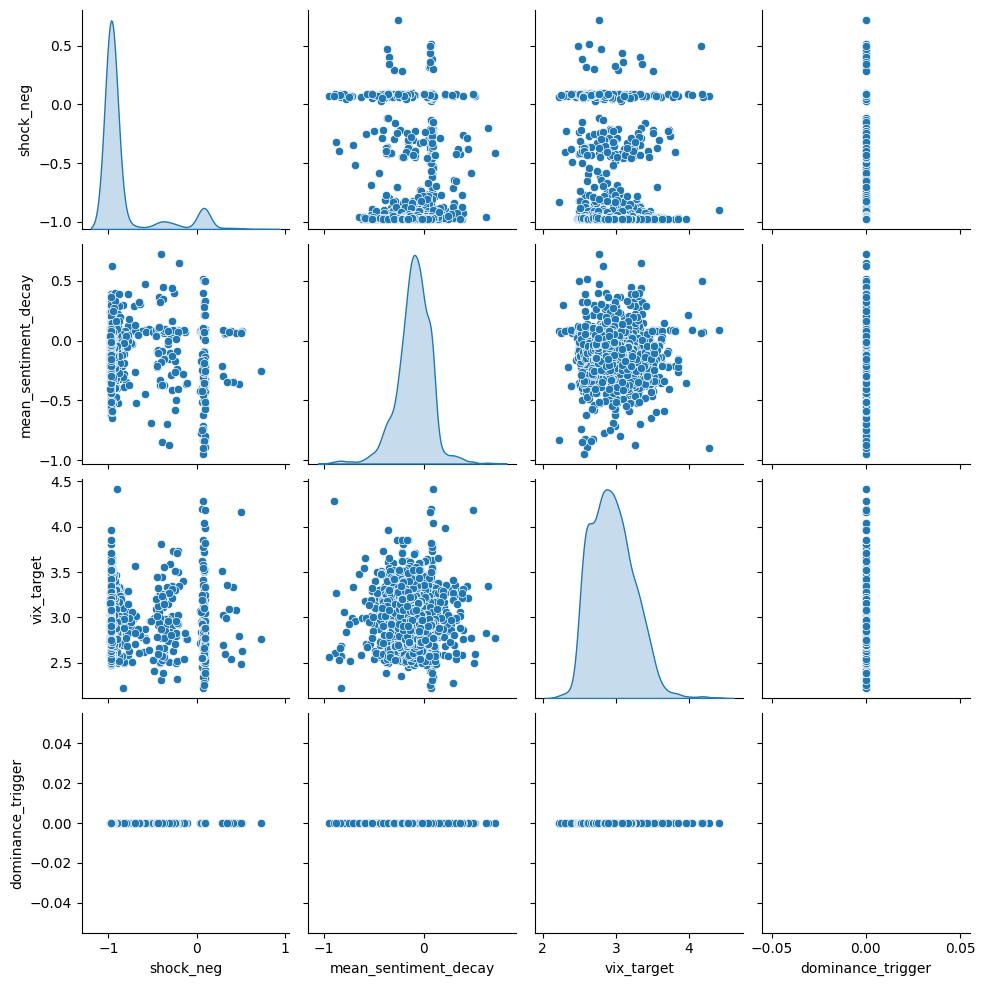

In [4659]:
import seaborn as sns
sns.pairplot(df, vars=['shock_neg', 'mean_sentiment_decay', 'vix_target', 'dominance_trigger'], diag_kind='kde')


In [4763]:
feature_sets = [ #for testing, winner was the first one, decreasing in quality for this model sequentially
    ['shock_neg', 'dominance_trigger'],
    ['shock_neg', 'sentiment_dominance'],
    ['shock_neg', 'sentiment_dominance', 'overall_min'],
    ['shock_pos', 'shock_neg', 'sentiment_dominance', 'overall_min'],
    ['shock_neg', 'mean_sentiment_decay', 'overall_min', 'sentiment_dominance']
]
selected_features = feature_sets[0]

In [5019]:
df

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,date.1
date,,,,,,,,,,,,,,,,,,,,,
2017-12-13,0.086767,0.086767,0,-0.533592,-0.533592,0,2,-0.223413,-0.223413,2,...,NaN,2.320425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-13
2017-12-14,0.091055,0.091055,0,0.091055,0.091055,1255,0,0.091055,0.091055,2510,...,NaN,2.335924,0.021211,0.683537,2.320425,2.320425,2.320425,NaN,NaN,2017-12-14
2017-12-26,0.090923,0.090923,0,0.090923,0.090923,1,0,0.090923,0.090923,2,...,NaN,2.332847,0.015595,-0.357155,2.335424,2.335424,2.328174,0.010606,0.683537,2017-12-26
2017-12-27,0.505010,0.060151,0,0.086224,0.082667,2,0,0.295617,0.071409,4,...,NaN,2.337164,0.014904,0.761551,2.332708,2.332708,2.329788,0.007839,0.372623,2017-12-27
2018-01-02,0.065905,0.065905,0,0.085878,0.085878,1,0,0.075892,0.075892,2,...,NaN,2.324002,0.029962,-1.491411,2.336660,2.336660,2.331681,0.007223,0.689259,2018-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-18,-0.019081,-0.977150,190,-0.013070,-0.973174,480,172,-0.016076,-0.975162,942,...,-0.963844,3.112113,0.240209,-0.585628,3.194960,3.194960,3.308679,0.125345,-0.907252,2025-05-18
2025-05-19,-0.168849,-0.975605,394,-0.177145,-0.974373,590,377,-0.172997,-0.974989,1163,...,-1.222769,3.098307,0.238405,-0.839695,3.180501,3.180501,3.300409,0.125393,-0.956257,2025-05-19
2025-05-20,-0.094376,-0.976516,510,-0.044465,-0.974235,968,380,-0.069420,-0.975375,1806,...,-1.154612,3.085214,0.236097,-0.804138,3.160921,3.160921,3.291410,0.126190,-1.034074,2025-05-20


In [5020]:
df.index = pd.to_datetime(df['date'])
df.tail()

KeyError: 'date'

In [5214]:
df['sentiment_dominance']

date
2017-12-13       2
2017-12-14    1255
2017-12-26       1
2017-12-27       2
2018-01-02       1
              ... 
2025-05-22     444
2025-05-23     302
2025-05-24     323
2025-05-25     243
2025-05-26     477
Name: sentiment_dominance, Length: 1941, dtype: int64

In [5215]:
df = df.drop(columns=['summary_max', 'summary_pos_count', 'headline_max', 'overall_max'])

In [5216]:
df = df.drop(columns=['shock_pos'])

In [5217]:
#df['vix_target_log'] = np.log(df['vix_target'])
#df['vix_target_log_ret'] = df['vix_target_log'].diff().dropna()

# Train: Post-COVID to end of 2023
#train_df = df[(df.index >= "2018-05-01") & (df.index <= "2024-10-15")]
train_df = df[(df.index <= "2024-10-15")]
# Test: Recent years
test_df = df[df.index >= "2024-10-16"]
print(f"Train set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")

df_model = train_df.dropna(subset=feature_sets[4] + ['vix_zscore']).copy() #i chose first set.
X = df_model[feature_sets[0]]
y = df_model['vix_ewm_zscore_flat']


Train set: 1721 rows
Test set: 220 rows


In [5219]:
X.isna().sum()
y.isna().sum()

np.int64(0)

In [5220]:
train_df.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat
date,,,,,,,,,,,,,,,,,,,,,
2024-10-11,-0.313376,-0.972448,58,-0.157393,-0.971905,57,48,-0.235385,-0.972176,104,...,0.104689,1.027813,2.941008,0.138724,0.558400,2.884792,2.884792,2.878081,0.037181,0.180487
2024-10-12,0.181630,-0.959148,9,0.054226,-0.946041,31,6,0.117928,-0.952595,59,...,0.052903,0.684078,2.943563,0.134539,0.275423,2.889641,2.889641,2.878827,0.036077,0.299744
2024-10-13,-0.280690,-0.969393,10,-0.232838,-0.916358,12,8,-0.256764,-0.942875,22,...,0.058006,0.638994,2.945954,0.130456,0.265718,2.894418,2.894418,2.879833,0.035111,0.415389
2024-10-14,0.009047,-0.974299,24,-0.044218,-0.972195,43,20,-0.017585,-0.973247,82,...,0.058006,0.600578,2.948191,0.126475,0.256400,2.900205,2.900205,2.881147,0.034339,0.554998
2024-10-15,-0.242439,-0.975493,63,-0.210137,-0.972273,74,56,-0.226288,-0.973883,141,...,0.074552,0.911308,2.953290,0.123911,0.596727,2.904845,2.904845,2.882676,0.033736,0.657131


In [5221]:
test_df_trade = test_df.copy()

In [5014]:
test_df.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,date.1
date,,,,,,,,,,,,,,,,,,,,,
2025-05-18,-0.019081,-0.977150,190,-0.013070,-0.973174,480,172,-0.016076,-0.975162,942,...,-0.963844,3.112113,0.240209,-0.585628,3.194960,3.194960,3.308679,0.125345,-0.907252,2025-05-18
2025-05-19,-0.168849,-0.975605,394,-0.177145,-0.974373,590,377,-0.172997,-0.974989,1163,...,-1.222769,3.098307,0.238405,-0.839695,3.180501,3.180501,3.300409,0.125393,-0.956257,2025-05-19
2025-05-20,-0.094376,-0.976516,510,-0.044465,-0.974235,968,380,-0.069420,-0.975375,1806,...,-1.154612,3.085214,0.236097,-0.804138,3.160921,3.160921,3.291410,0.126190,-1.034074,2025-05-20
2025-05-21,-0.111569,-0.976831,628,-0.079321,-0.974726,1190,540,-0.095445,-0.975778,2292,...,-0.440580,3.082188,0.228654,-0.191883,3.144451,3.144451,3.281929,0.127455,-1.078638,2025-05-21
2025-05-22,-0.144944,-0.976194,738,-0.134255,-0.975201,1182,671,-0.139599,-0.975698,2297,...,-0.506577,3.077824,0.221800,-0.285258,3.128359,3.128359,3.272021,0.129110,-1.112713,NaN


In [203]:
percentile_markov = 0.08

In [ ]:
transition_matrix, results, df_model = macro_utils.regime_t_markov_model(X, y, df_model, k=2, percentile=percentile_markov)

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [205]:
df_model.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,regime_t_raw,regime_t,regime_t+1,regime_t+1_raw
date,,,,,,,,,,,,,,,,,,,,,
2024-10-11,-0.313376,-0.972448,58,-0.157393,-0.971905,57,48,-0.235385,-0.972176,104,...,0.501729,18.034666,18.034666,18.030169,1.283896,0.003503,0.065116,0,1.0,0.122250
2024-10-12,0.181630,-0.959148,9,0.054226,-0.946041,31,6,0.117928,-0.952595,59,...,0.211239,18.127000,18.127000,18.036416,1.242025,0.072932,0.122250,1,1.0,0.245281
2024-10-13,-0.280690,-0.969393,10,-0.232838,-0.916358,12,8,-0.256764,-0.942875,22,...,0.204007,18.214666,18.214666,18.047916,1.202117,0.138714,0.245281,1,1.0,0.495994
2024-10-14,0.009047,-0.974299,24,-0.044218,-0.972195,43,20,-0.017585,-0.973247,82,...,0.197043,18.319333,18.319333,18.065427,1.164669,0.218007,0.495994,1,1.0,0.787314
2024-10-15,-0.242439,-0.975493,63,-0.210137,-0.972273,74,56,-0.226288,-0.973883,141,...,0.556791,18.404667,18.404667,18.087313,1.129657,0.280929,0.787314,1,NaN,NaN


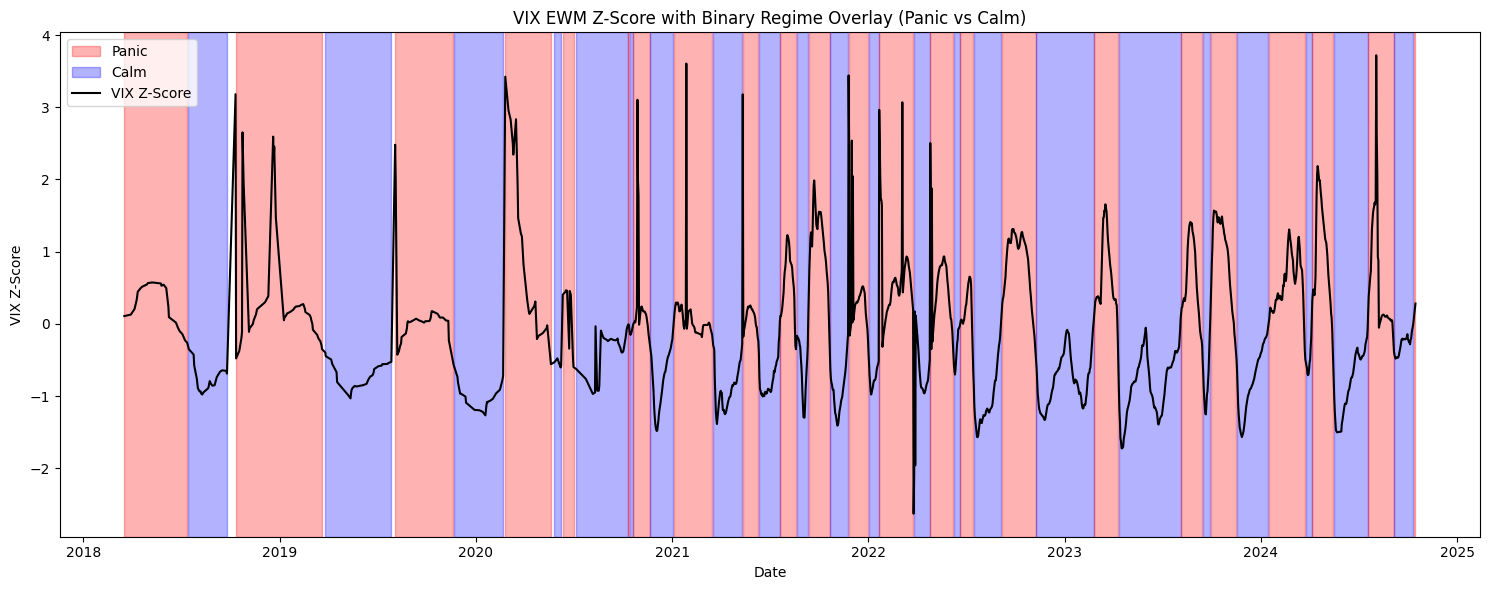

In [209]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 6))
plt.plot(df_model.index, df_model['vix_ewm_zscore_flat'], label='VIX_t (EWM Z-Score)', color='black')

# Efficient binary shading
start_idx = None
current_regime = None

for i in range(len(df_model)):
    regime = df_model['regime_t'].iloc[i]
    
    if regime != current_regime:
        if current_regime is not None:
            # Draw previous span
            plt.axvspan(df_model.index[start_idx], df_model.index[i - 1],
                        color='red' if current_regime == 1 else 'blue', alpha=0.3)
        # Start new span
        start_idx = i
        current_regime = regime

# Draw last span
if current_regime is not None:
    plt.axvspan(df_model.index[start_idx], df_model.index[-1],
                color='red' if current_regime == 1 else 'blue', alpha=0.3)

# Legend and labels
panic_patch = mpatches.Patch(color='red', alpha=0.3, label='Panic')
calm_patch = mpatches.Patch(color='blue', alpha=0.3, label='Calm')
plt.legend(handles=[panic_patch, calm_patch, plt.Line2D([], [], color='black', label='VIX Z-Score')])

plt.title('VIX EWM Z-Score with Binary Regime Overlay (Panic vs Calm)')
plt.xlabel('Date')
plt.ylabel('VIX Z-Score')
plt.tight_layout()
plt.show()


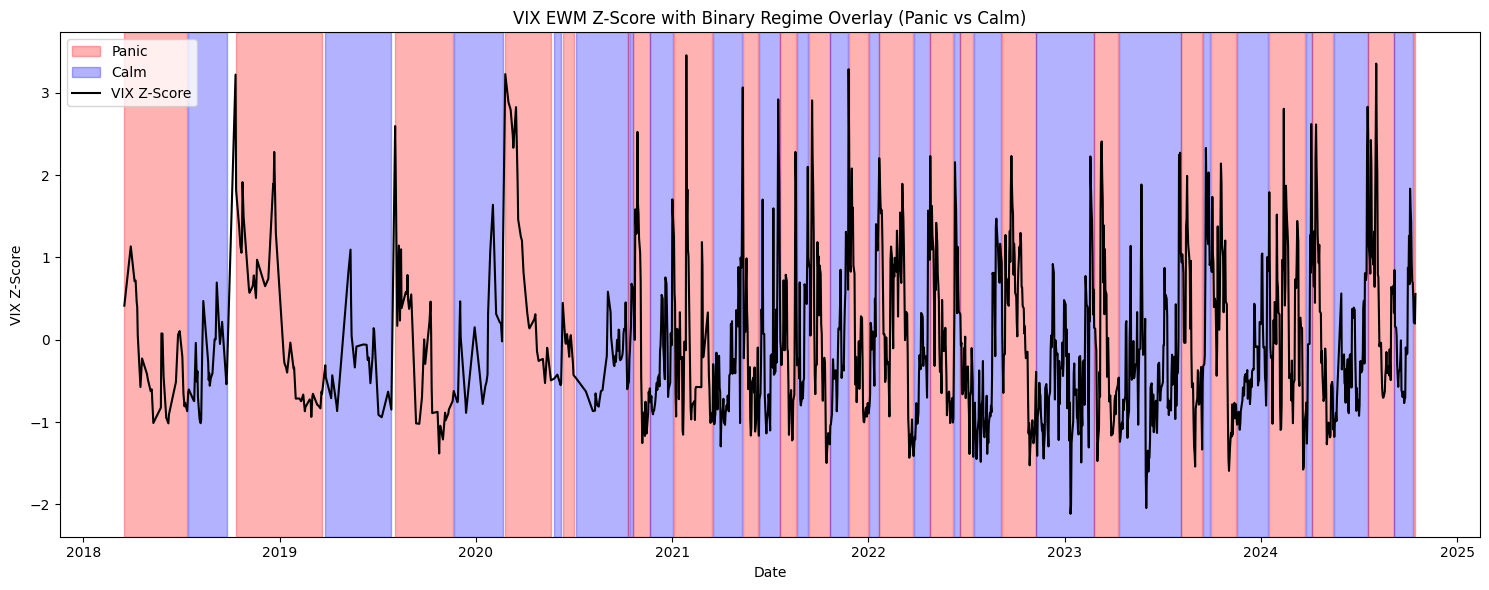

In [210]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 6))
plt.plot(df_model.index, df_model['vix_ewm_zscore'], label='VIX_t (Z-Score)', color='black')

# Efficient binary shading
start_idx = None
current_regime = None

for i in range(len(df_model)):
    regime = df_model['regime_t'].iloc[i]
    
    if regime != current_regime:
        if current_regime is not None:
            # Draw previous span
            plt.axvspan(df_model.index[start_idx], df_model.index[i - 1],
                        color='red' if current_regime == 1 else 'blue', alpha=0.3)
        # Start new span
        start_idx = i
        current_regime = regime

# Draw last span
if current_regime is not None:
    plt.axvspan(df_model.index[start_idx], df_model.index[-1],
                color='red' if current_regime == 1 else 'blue', alpha=0.3)

# Legend and labels
panic_patch = mpatches.Patch(color='red', alpha=0.3, label='Panic')
calm_patch = mpatches.Patch(color='blue', alpha=0.3, label='Calm')
plt.legend(handles=[panic_patch, calm_patch, plt.Line2D([], [], color='black', label='VIX Z-Score')])

plt.title('VIX EWM Z-Score with Binary Regime Overlay (Panic vs Calm)')
plt.xlabel('Date')
plt.ylabel('VIX Z-Score')
plt.tight_layout()
plt.show()


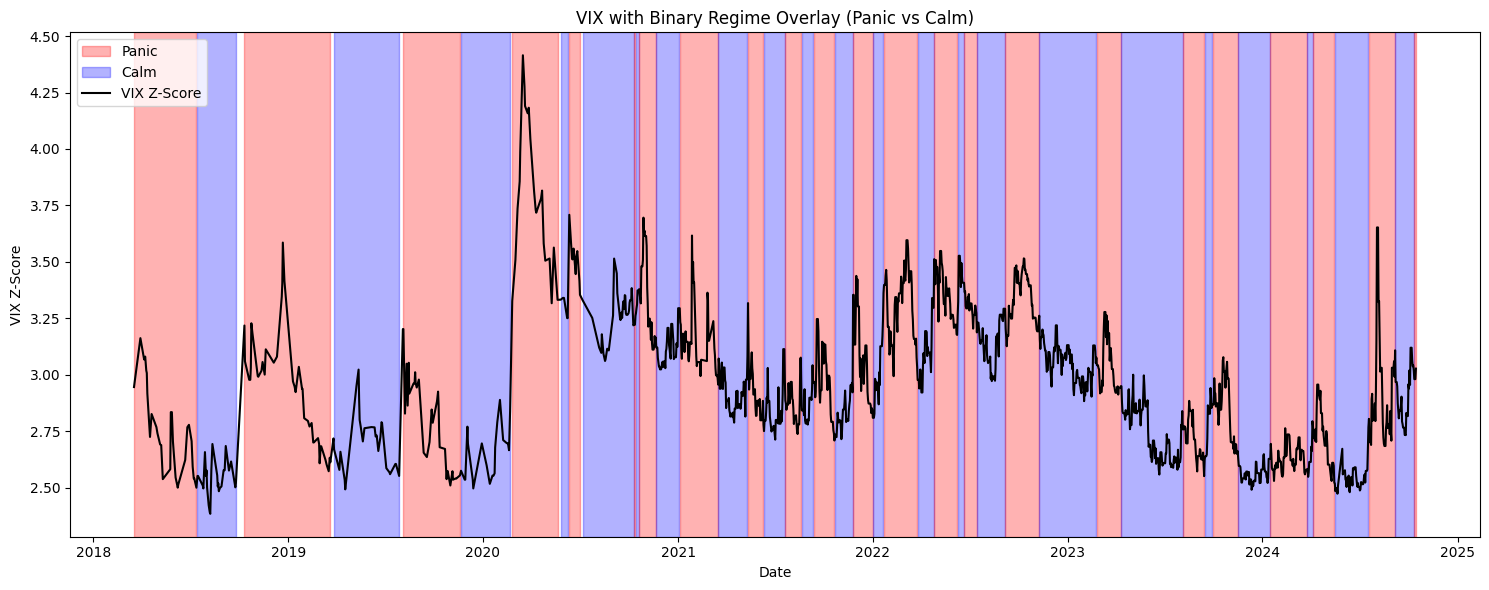

In [211]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 6))
plt.plot(df_model.index, df_model['vix_target'], label='VIX_t', color='black')

# Efficient binary shading
start_idx = None
current_regime = None

for i in range(len(df_model)):
    regime = df_model['regime_t'].iloc[i]
    
    if regime != current_regime:
        if current_regime is not None:
            # Draw previous span
            plt.axvspan(df_model.index[start_idx], df_model.index[i - 1],
                        color='red' if current_regime == 1 else 'blue', alpha=0.3)
        # Start new span
        start_idx = i
        current_regime = regime

# Draw last span
if current_regime is not None:
    plt.axvspan(df_model.index[start_idx], df_model.index[-1],
                color='red' if current_regime == 1 else 'blue', alpha=0.3)

# Legend and labels
panic_patch = mpatches.Patch(color='red', alpha=0.3, label='Panic')
calm_patch = mpatches.Patch(color='blue', alpha=0.3, label='Calm')
plt.legend(handles=[panic_patch, calm_patch, plt.Line2D([], [], color='black', label='VIX Z-Score')])

plt.title('VIX with Binary Regime Overlay (Panic vs Calm)')
plt.xlabel('Date')
plt.ylabel('VIX Z-Score')
plt.tight_layout()
plt.show()


In [213]:
df_model.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,regime_t_raw,regime_t,regime_t+1,regime_t+1_raw
date,,,,,,,,,,,,,,,,,,,,,
2024-10-11,-0.313376,-0.972448,58,-0.157393,-0.971905,57,48,-0.235385,-0.972176,104,...,0.501729,18.034666,18.034666,18.030169,1.283896,0.003503,0.065116,0,1.0,0.122250
2024-10-12,0.181630,-0.959148,9,0.054226,-0.946041,31,6,0.117928,-0.952595,59,...,0.211239,18.127000,18.127000,18.036416,1.242025,0.072932,0.122250,1,1.0,0.245281
2024-10-13,-0.280690,-0.969393,10,-0.232838,-0.916358,12,8,-0.256764,-0.942875,22,...,0.204007,18.214666,18.214666,18.047916,1.202117,0.138714,0.245281,1,1.0,0.495994
2024-10-14,0.009047,-0.974299,24,-0.044218,-0.972195,43,20,-0.017585,-0.973247,82,...,0.197043,18.319333,18.319333,18.065427,1.164669,0.218007,0.495994,1,1.0,0.787314
2024-10-15,-0.242439,-0.975493,63,-0.210137,-0.972273,74,56,-0.226288,-0.973883,141,...,0.556791,18.404667,18.404667,18.087313,1.129657,0.280929,0.787314,1,NaN,NaN


In [214]:
df_model = df_model.dropna()

In [215]:
clf, y_pred, classification_df = macro_utils.clf_panic_tomorrow(df_model, selected_features, 'regime_t+1')

              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73       839
         1.0       0.75      0.66      0.70       852

    accuracy                           0.72      1691
   macro avg       0.72      0.72      0.72      1691
weighted avg       0.72      0.72      0.72      1691



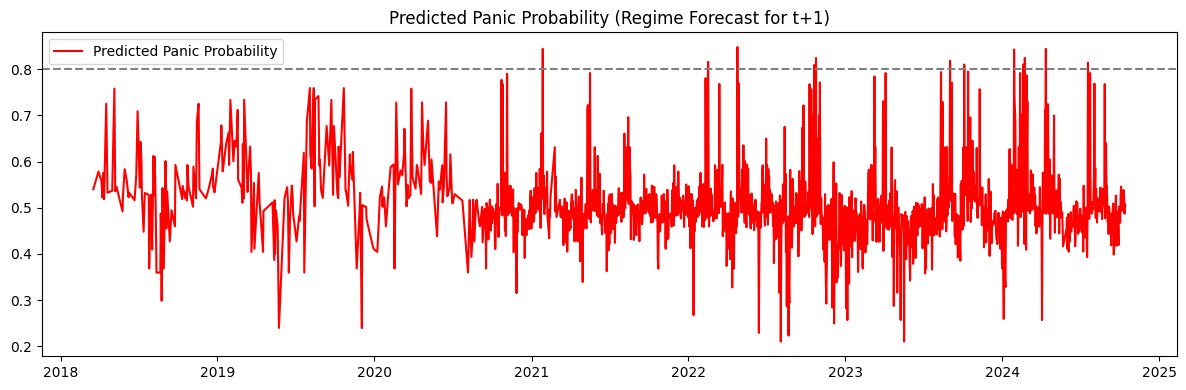

In [216]:
plt.figure(figsize=(12, 4))
plt.plot(df_model.index, df_model['panic_prob'], label='Predicted Panic Probability', color='red')
plt.axhline(0.8, linestyle='--', color='gray')
plt.title("Predicted Panic Probability (Regime Forecast for t+1)")
plt.legend()
plt.tight_layout()
plt.show()


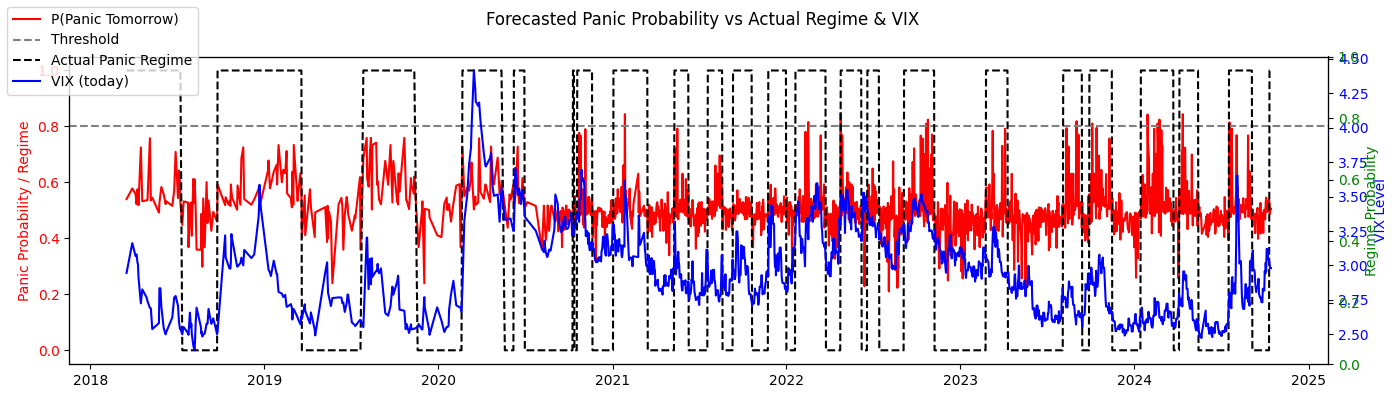

In [217]:
fig, ax1 = plt.subplots(figsize=(14, 4)) #GOLD. panic regime probability goes up before vix even spikes. probability of panic tomorrow from classifier is high.

# Panic probability
ax1.plot(classification_df.index, classification_df['panic_prob'], label='P(Panic Tomorrow)', color='red')
ax1.axhline(0.8, linestyle='--', color='gray', label='Threshold')
ax1.plot(classification_df.index, classification_df['regime_t+1'], linestyle='--', color='black', label='Actual Panic Regime')
ax1.set_ylabel("Panic Probability / Regime", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Add second y-axis for VIX
ax2 = ax1.twinx()
ax2.plot(classification_df.index, classification_df['vix_target'], label='VIX (today)', color='blue')
ax2.set_ylabel("VIX Level", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()
#ax3.plot(classification_df.index, classification_df['regime_t_raw'], label='Regime Probability', color='green')
ax3.set_ylabel("Regime Probability", color='green')
ax3.tick_params(axis='y', labelcolor='green')

fig.suptitle("Forecasted Panic Probability vs Actual Regime & VIX")
fig.tight_layout()
fig.legend(loc='upper left')
plt.show()
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()


for each regime=1, we now get the set of days aferwards to see how vix behaves as soon as the model changes regime

In [218]:

classification_df = macro_utils.identify_sustained_regimes_and_transitions(classification_df)

In [219]:
classification_df['is_transition'].value_counts()

is_transition
False    1669
True       22
Name: count, dtype: int64

In [221]:
classification_df['regime_t']

date
2018-03-18    1
2018-03-30    1
2018-04-06    1
2018-04-08    1
2018-04-10    1
             ..
2024-10-10    0
2024-10-11    0
2024-10-12    1
2024-10-13    1
2024-10-14    1
Name: regime_t, Length: 1691, dtype: int64

In [222]:

# Usage Example:
result = macro_utils.transform_vix_data(classification_df, window=60, k=2)
vix_windows_df_train = result["vix_windows_df_train"]
regime_windows_df_train = result["regime_windows_df_train"]
vix_windows_past_df_train = result["vix_windows_past_df_train"]


In [223]:
regime_windows_df_train.shape

(20, 60)

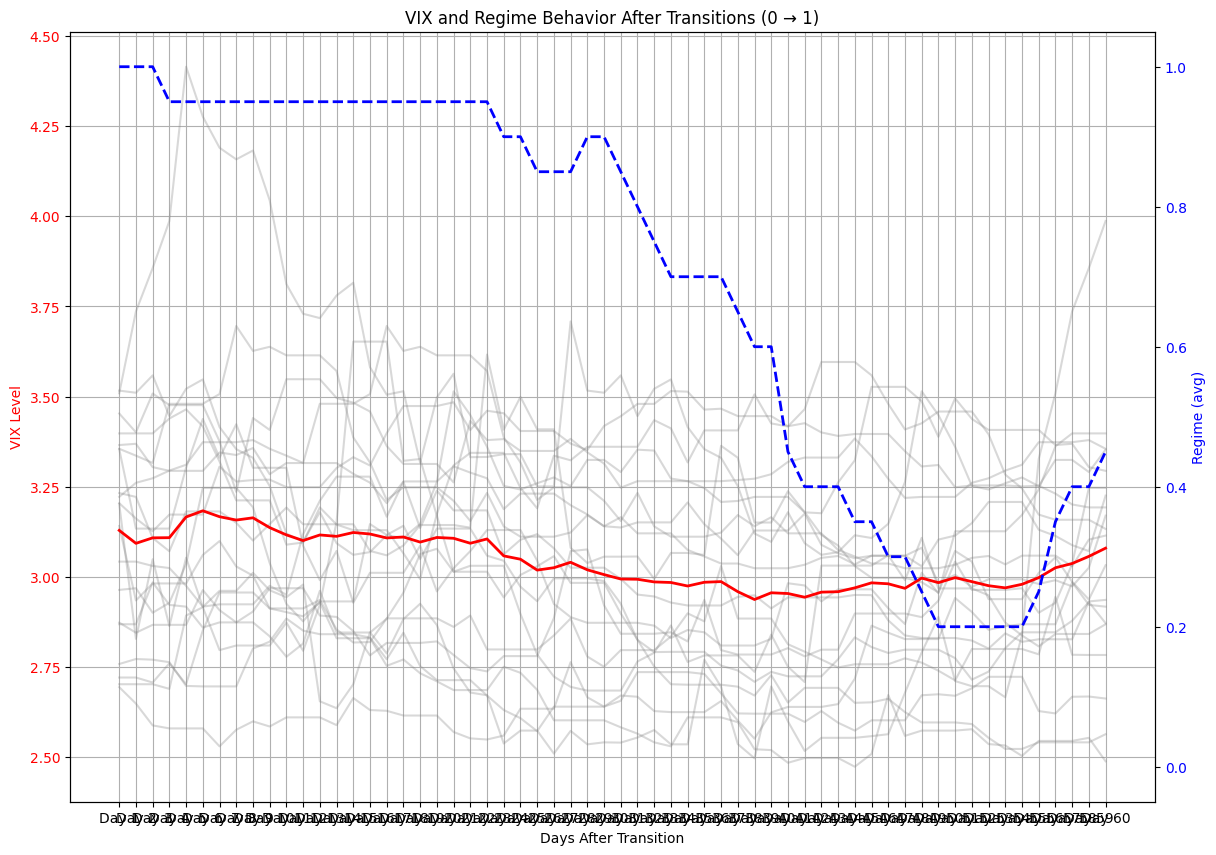

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Primary axis: VIX transitions
ax1 = plt.gca()
ax1.plot(vix_windows_df_train.T, color="gray", alpha=0.3, label="Individual VIX transitions")
ax1.plot(vix_windows_df_train.mean(axis=0).values, color="red", linewidth=2, label="Mean VIX path")
ax1.set_xlabel("Days After Transition")
ax1.set_ylabel("VIX Level", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_title("VIX and Regime Behavior After Transitions (0 → 1)")
ax1.grid(True)

# Secondary axis: Regime values
ax2 = ax1.twinx()
ax2.plot(regime_windows_df_train.mean(axis=0).values, color="blue", linewidth=2, linestyle="--", label="Mean Regime level")
ax2.set_ylabel("Regime (avg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(-0.05, 1.05)  # Because regime is binary

# Combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#plt.tight_layout()
plt.show()



since some spikes happen quite some time after the regime switches, we will build a classifier for 0 (immediate) or 1 (delayed), then feed this into a model for vix level forecasting

In [225]:
vix_windows_past_df_train.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 51,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60
transition_time,,,,,,,,,,,,,,,,,,,,,
2019-08-04,3.017983,3.056357,3.000720,3.112626,3.053529,3.080073,3.345685,3.404857,3.585461,3.414771,...,2.662355,2.725235,2.789937,2.785628,2.586259,2.567254,2.559550,2.604909,2.604909,2.551786
2020-02-25,2.559550,2.604909,2.604909,2.551786,3.202340,3.202340,2.827905,3.048799,2.863343,3.053057,...,2.558002,2.563410,2.678278,2.789937,2.888704,2.710713,2.696652,2.696652,2.665838,2.837908
2020-06-11,2.537657,2.573375,2.573375,2.509599,2.572612,2.535283,2.540814,2.540026,2.554122,2.574900,...,3.514824,3.316728,3.497719,3.563316,3.331847,3.332562,3.340385,3.340385,3.250762,3.250762
2020-10-11,3.514824,3.316728,3.497719,3.563316,3.331847,3.332562,3.340385,3.340385,3.250762,3.250762,...,3.284664,3.318902,3.330775,3.330775,3.330775,3.383712,3.334345,3.271848,3.218876,3.221672
2020-10-20,3.250762,3.708437,3.516607,3.510650,3.558771,3.445852,3.521644,3.547604,3.415429,3.354106,...,3.221672,3.221672,3.221672,3.260785,3.273364,3.294725,3.310908,3.373484,3.373484,3.373484


In [226]:
vix_windows_df_train.iloc[-1].max()

np.float64(3.6524747643078785)

In [227]:
df_delayed_spike_prob, clf_delayed_spike_prob, vix_pct_change_lookback_df_train = macro_utils.clf_delayed_spike_prob(vix_windows_df_train, df_model, "vix_target")

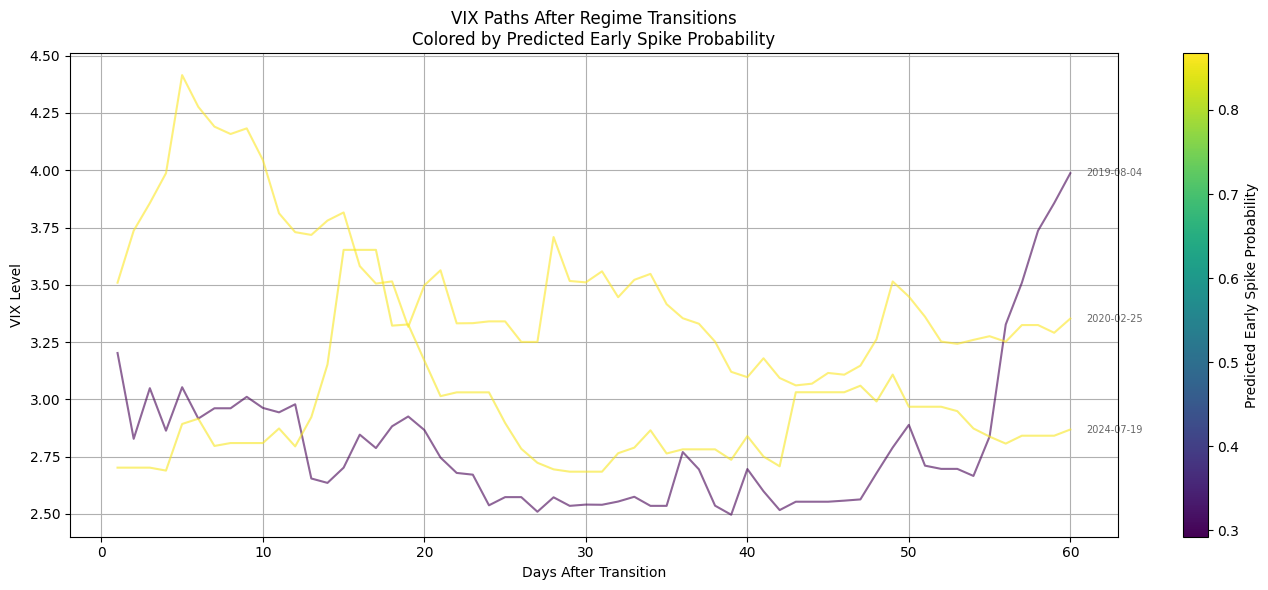

In [228]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Filter rows with predictions
df_plot = df_delayed_spike_prob.dropna(subset=["early_spike_prob"])

# Normalize probs for coloring
probs = df_plot["early_spike_prob"]
colors = cm.viridis((probs - probs.min()) / (probs.max() - probs.min()))

fig, ax = plt.subplots(figsize=(14, 6))

# Plot VIX paths, colored by classifier probability
for i, (date, row) in enumerate(df_plot.iterrows()):
    vix_path = row.iloc[:60]  # assumes 60-day VIX columns are first
    ax.plot(range(1, 61), vix_path.values, color=colors[i], alpha=0.6)
    ax.text(61, vix_path.values[-1], date.strftime("%Y-%m-%d"), fontsize=7, alpha=0.6, va="center")

# Add colorbar
sm = ScalarMappable(cmap="viridis", norm=Normalize(vmin=probs.min(), vmax=probs.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Early Spike Probability")

# Labels and layout
ax.set_title("VIX Paths After Regime Transitions\nColored by Predicted Early Spike Probability")
ax.set_xlabel("Days After Transition")
ax.set_ylabel("VIX Level")
ax.grid(True)
plt.tight_layout()
plt.show()



In [229]:
classification_df['regime_t'].value_counts()

regime_t
1    852
0    839
Name: count, dtype: int64

We will now predict whether the regime switch is a spike or not

because of randomness, we will just predict peak, half decay time, and rising time.

In [230]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news = train_df.copy()                       # original df you posted   # string/ts column → index
news = news.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()


    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats = engineer_news_feats(news)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats.index = pd.to_datetime(news_feats.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats.index.min(),
                          news_feats.index.max(),
                          freq='D')

news_dense = (
    news_feats
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)



/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_20542/37269508.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .ffill()                 # carry last known sentiment forward


In [231]:
train_df.head()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat
date,,,,,,,,,,,,,,,,,,,,,
2017-12-13,0.086767,0.086767,0,-0.533592,-0.533592,0,2,-0.223413,-0.223413,2,...,NaN,NaN,10.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-14,0.091055,0.091055,0,0.091055,0.091055,1255,0,0.091055,0.091055,2510,...,NaN,NaN,10.340167,0.219203,0.683537,10.180000,10.180000,10.180000,NaN,NaN
2017-12-26,0.090923,0.090923,0,0.090923,0.090923,1,0,0.090923,0.090923,2,...,NaN,NaN,10.308086,0.161318,-0.360072,10.335000,10.335000,10.260084,0.109601,0.683537
2017-12-27,0.505010,0.060151,0,0.086224,0.082667,2,0,0.295617,0.071409,4,...,NaN,NaN,10.352699,0.154126,0.761071,10.306667,10.306667,10.276658,0.080952,0.370704
2018-01-02,0.065905,0.065905,0,0.085878,0.085878,1,0,0.075892,0.075892,2,...,NaN,NaN,10.220121,0.303267,-1.484241,10.347500,10.347500,10.296177,0.074564,0.688304


In [232]:
vix_windows_df_train

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2019-08-04,3.202340,2.827905,3.048799,2.863343,3.053057,2.916148,2.961141,2.961141,3.011113,2.962692,...,2.696652,2.696652,2.665838,2.837908,3.326833,3.509154,3.736240,3.856510,3.987131,0.2925
2020-02-25,3.509154,3.736240,3.856510,3.987131,4.415099,4.276666,4.190261,4.158102,4.182661,4.044454,...,3.252311,3.242202,3.259634,3.275634,3.251537,3.324316,3.324316,3.290638,3.352707,0.8675
2020-06-11,3.516607,3.510650,3.558771,3.445852,3.521644,3.547604,3.415429,3.354106,3.330059,3.251924,...,3.260785,3.273364,3.294725,3.310908,3.373484,3.373484,3.373484,3.379293,3.355153,NaN
2020-10-11,3.221672,3.260785,3.273364,3.294725,3.310908,3.373484,3.373484,3.373484,3.379293,3.355153,...,3.052585,3.057768,3.034472,3.058707,3.058707,3.058707,3.029167,3.103241,3.114404,NaN
2020-10-20,3.355153,3.336125,3.316003,3.480009,3.480009,3.480009,3.507058,3.695855,3.626738,3.638112,...,3.148882,3.207613,3.207613,3.207613,3.130700,3.113515,3.087856,3.071303,3.225255,NaN
2021-01-04,3.232384,3.221672,3.107721,3.070840,3.181382,3.181382,3.181382,3.149740,3.100543,3.146305,...,3.042139,2.938103,2.938103,2.938103,3.010621,3.054001,2.986187,2.937043,3.032064,NaN
2021-05-12,3.141130,2.934389,2.981633,2.981633,2.981633,3.060583,3.099191,3.028683,3.003204,2.912351,...,2.799717,2.799717,2.799717,2.799717,2.785011,2.944439,2.783776,2.783158,2.783158,NaN
2021-07-21,2.873000,2.844909,2.866762,2.866762,2.866762,2.963209,2.907447,2.873565,2.903617,2.968361,...,2.963726,2.963726,2.963726,2.968361,2.900322,2.927989,3.035434,3.246880,3.246880,NaN
2021-09-12,2.963726,2.968361,2.900322,2.927989,3.035434,3.246880,3.246880,3.246880,3.192942,3.038313,...,2.714695,2.736962,2.802147,2.846071,2.846071,2.846071,2.878074,2.930126,2.871302,NaN


In [233]:
# ------------------------------------------------------------
# 3)  BUILD ARC-LEVEL TABLE  (robust to missing news dates + look-back stats)
# ------------------------------------------------------------
records = []
lookback_days = [2, 5, 7]
lookback_feats = [
    "shock_neg",
    "vix_zscore",
    "vix_target",
    "sentiment_dominance",

]

for dt, row in vix_windows_df_train.iterrows():
    # --- detect arc in the 60-day window ---
    v = row[[f"Day {i}" for i in range(1, 61)]].values
    r = regime_windows_df_train.loc[dt, [f"Day {i}" for i in range(1, 61)]].values
    start_idx, peak_idx = macro_utils.detect_spike_arc_within_regime(v, r)
    print(start_idx, peak_idx)
    start_val, peak_val = v[start_idx], v[peak_idx]
    rise_dur = peak_idx - start_idx
    decay_idx = np.argmax(v[peak_idx:] < 0.5 * peak_val)
    half_life = decay_idx if decay_idx > 0 else len(v) - peak_idx

    dt_norm = pd.to_datetime(dt).normalize()

    # -------- safe fetch of nearest-past news features --------
    try:
        feats_on_start = news_dense.loc[:dt_norm].iloc[-1].to_dict()
    except IndexError:
        # no prior news available – skip this arc
        continue

    # -------- compute look-back statistics from classification_df --------
    lookback_stats = {}
    for w in lookback_days:
        start_date = dt_norm - pd.Timedelta(days=w)
        window_df = classification_df.loc[start_date:dt_norm]

        for feat in lookback_feats:
            col_mean = window_df[feat].mean()
            col_std = window_df[feat].std()
            # percent change over the window: (last−first) / first
            if len(window_df) > 1 and window_df[feat].iloc[0] != 0:
                col_pct = (window_df[feat].iloc[-1] - window_df[feat].iloc[0]) / window_df[feat].iloc[0]
            else:
                col_pct = np.nan

            lookback_stats[f"{feat}_mean_{w}d"] = col_mean
            lookback_stats[f"{feat}_std_{w}d"]  = col_std
            lookback_stats[f"{feat}_pctchg_{w}d"] = col_pct

    # --- aggregate everything into one record ---
    records.append({
        "date_start":    dt_norm,
        "peak_vix":      peak_val,
        "vix0":          start_val,
        "T_up":          rise_dur,
        "T_half":        half_life,
        **feats_on_start,
        **lookback_stats,
    })

arc_df = (
    pd.DataFrame(records)
      .set_index("date_start")
      .astype(float, errors="ignore")
)

print("arc_df shape:", arc_df.shape)

0 4
0 4
0 2
0 2
0 7
0 22
0 6
0 28
0 5
0 5
34 42
0 10
0 1
0 33
5 13
0 10
10 19
0 27
0 6
3 14
arc_df shape: (20, 68)


In [234]:
arc_df['early_spike_prob'] = vix_windows_df_train['early_spike_prob'].fillna(0.5)

In [235]:
arc_df = arc_df.dropna()

In [236]:
arc_df = arc_df.drop(columns=['vix_target'])

In [237]:
len(arc_df)

17

In [238]:
arc_df['delta_peak'] = arc_df['peak_vix'] - arc_df['vix0']
arc_df['spike5d'] = (arc_df['delta_peak'] > 0.1 * arc_df['vix0']).astype(int)

In [239]:
arc_df

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob,delta_peak,spike5d
date_start,,,,,,,,,,,,,,,,,,,,,
2020-10-11,3.273364,3.221672,2.0,58.0,-0.110409,-0.844226,4.0,0.110665,-0.880222,13.0,...,-2.961001,3.289209,0.064136,-0.032756,16.250,39.881073,-0.829268,0.5000,0.051692,0
2020-10-20,3.695855,3.355153,7.0,53.0,-0.246935,-0.967419,85.0,-0.288031,-0.970770,111.0,...,-3.659009,3.329941,0.050298,0.036343,55.250,94.756455,0.375000,0.5000,0.340702,1
2021-01-04,3.616578,3.232384,22.0,38.0,0.160448,-0.963692,17.0,0.139017,-0.960091,62.0,...,-5.046940,3.205649,0.096852,0.070650,113.500,84.083292,-0.292308,0.5000,0.384193,1
2021-05-12,3.099191,3.141130,6.0,54.0,-0.451187,-0.973365,54.0,-0.231617,-0.968560,44.0,...,1.245645,3.001984,0.148074,0.123683,7.625,20.996173,-1.733333,0.5000,-0.041939,0
2021-07-21,3.075929,2.873000,28.0,32.0,-0.318241,-0.975836,16.0,0.008324,-0.972170,20.0,...,-2.233740,2.968739,0.132009,0.033067,9.875,11.076842,-1.062500,0.5000,0.202929,0
2021-09-12,3.246880,2.963726,5.0,55.0,-0.047441,-0.970680,36.0,-0.003772,-0.949402,118.0,...,0.451366,2.935744,0.052647,0.022637,93.125,49.194766,2.650000,0.5000,0.283154,0
2021-11-25,3.437851,3.354106,5.0,55.0,-0.127910,-0.974813,77.0,-0.122736,-0.970536,121.0,...,2.584301,2.981645,0.154605,0.169766,44.875,42.018491,0.772727,0.5000,0.083745,0
2022-01-21,3.595941,3.317453,8.0,18.0,-0.249692,-0.975070,10.0,-0.177979,-0.961657,17.0,...,18.645145,3.154472,0.116074,0.138005,3.750,6.017831,0.250000,0.5000,0.278488,0
2022-04-26,3.548180,3.453157,10.0,50.0,0.060260,-0.969785,10.0,-0.131789,-0.960483,14.0,...,-82.100343,3.242079,0.165384,0.147014,-3.500,10.555973,-1.173913,0.5000,0.095022,0


In [ ]:
# ============================================================
# 0)  CONFIG & IMPORTS
# ============================================================
import numpy as np
import itertools
import pandas as pd
import joblib

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import (
    make_scorer,
    mean_squared_error,
    mean_absolute_error,
)

# --- your DataFrame and columns ---
# arc_df: pandas DataFrame already in scope
target_cols  = ["peak_vix", "T_up", "T_half", "delta_peak", "spike5d"]
feature_cols = arc_df.columns.difference(target_cols)
X_full       = arc_df[feature_cols].values
y_full       = arc_df[target_cols].values

# --- CV and scoring setup ---
tscv         = TimeSeriesSplit(n_splits=10)
# train hyperparams on MSE:
mse_scorer   = make_scorer(mean_squared_error, greater_is_better=False)
# evaluate final models on MAE and Huber:
mae_scorer   = make_scorer(mean_absolute_error,   greater_is_better=False)
# ============================================================
# 1)  HYPERPARAMETER GRIDS
# ============================================================
param_grid_default = {
    "mlp__hidden_layer_sizes": [(10,5),(20,10),(15,10),(12,8),(16,10),(20,15),(25,10),(25,15),(25,20)],
    "mlp__alpha":              [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7],
    "mlp__learning_rate_init": [0.001,0.003,0.01,0.03,0.1,0.3,0.005,0.0005],
}
param_grid_delta   = {
    "mlp__hidden_layer_sizes": param_grid_default["mlp__hidden_layer_sizes"],
    "mlp__alpha":              param_grid_default["mlp__alpha"],
    "mlp__learning_rate_init": param_grid_default["mlp__learning_rate_init"],
}

models = {}
cv_scores = {}

# ============================================================
# 2)  GRID-SEARCH + FINAL FIT PER TARGET
# ============================================================
for col in target_cols:
    y        = y_full[:, target_cols.index(col)]
    is_delta = (col == "delta_peak")

    # base pipeline: scale X → MLPRegressor (default loss=MSE)
    base_pipe = Pipeline([
        ("scale_X", StandardScaler()),
        ("mlp", MLPRegressor(
            solver="adam",
            activation="tanh",
            max_iter=10000,
            random_state=38
        ))
    ])

    # wrap with QuantileTransformer on y
    pipe = TransformedTargetRegressor(
        regressor=base_pipe,
        transformer=QuantileTransformer(
            n_quantiles=10,
            output_distribution="normal",
            random_state=38
        )
    )

    # GRID SEARCH: hyperparams chosen to **minimize MSE**
    grid = GridSearchCV(
        estimator=pipe.regressor,
        param_grid=(param_grid_delta if is_delta else param_grid_default),
        cv=tscv,
        scoring=mse_scorer,
        n_jobs=-1,
        verbose=1
    )

    grid_pipe = TransformedTargetRegressor(
        regressor=grid,
        transformer=pipe.transformer
    )

    print(f"\n>>> Grid‐searching hyperparams for '{col}' …")
    grid_pipe.fit(X_full, y)

    best_params = grid_pipe.regressor_.best_params_
    best_score  = grid_pipe.regressor_.best_score_
    print(f"Best params for {col}: {best_params}")
    print(f"Best CV MSE  (10‐fold avg): {-best_score:.3f}")

    # build final model with those params
    mlp_kwargs = {k.replace("mlp__", ""): v for k, v in best_params.items()}
    final_pipe = TransformedTargetRegressor(
        regressor=Pipeline([
            ("scale_X", StandardScaler()),
            ("mlp", MLPRegressor(
                **mlp_kwargs,
                solver="adam",
                activation="tanh",
                max_iter=10000,
                random_state=38
            ))
        ]),
        transformer=pipe.transformer
    )
    final_pipe.fit(X_full, y)
    models[col] = final_pipe

    # 3) Evaluate **both** MAE & Huber on CV folds
    scoring = {'MAE': mae_scorer}
    cv_res  = cross_validate(
        final_pipe, X_full, y,
        cv=tscv,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )

    mean_mae   = -np.mean(cv_res['test_MAE'])
    cv_scores[col] = {'MAE': mean_mae}

    print(f"{col:12s} | Final CV MAE:   {mean_mae:.3f}")

    # save it
    joblib.dump(final_pipe, f"mlp_{col}.pkl")

# ============================================================
# 4)  SUMMARY
# ============================================================
print("\nSaved models:", list(models.keys()))
print("CV Scores:")
for col, scores in cv_scores.items():
    print(f"  {col:<10s} MAE={scores['MAE']:.3f}")



>>> Grid‐searching hyperparams for 'peak_vix' …
Fitting 10 folds for each of 504 candidates, totalling 5040 fits


Best params for peak_vix: {'mlp__alpha': 0.3, 'mlp__hidden_layer_sizes': (12, 8), 'mlp__learning_rate_init': 0.3}
Best CV MSE  (10‐fold avg): 2.839
peak_vix     | Final CV MAE:   0.265

>>> Grid‐searching hyperparams for 'T_up' …
Fitting 10 folds for each of 504 candidates, totalling 5040 fits


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (9). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (8). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (7). n_quantiles is set to n_samples.
  warnings.warn(


Best params for T_up: {'mlp__alpha': 0.6, 'mlp__hidden_layer_sizes': (25, 15), 'mlp__learning_rate_init': 0.3}
Best CV MSE  (10‐fold avg): 6.254
T_up         | Final CV MAE:   17.957

>>> Grid‐searching hyperparams for 'T_half' …
Fitting 10 folds for each of 504 candidates, totalling 5040 fits


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (7). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (8). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (9). n_quantiles is set to n_samples.
  warnings.warn(


Best params for T_half: {'mlp__alpha': 0.4, 'mlp__hidden_layer_sizes': (16, 10), 'mlp__learning_rate_init': 0.3}
Best CV MSE  (10‐fold avg): 5.421
T_half       | Final CV MAE:   17.066

>>> Grid‐searching hyperparams for 'delta_peak' …
Fitting 10 folds for each of 504 candidates, totalling 5040 fits


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (7). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (8). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (9). n_quantiles is set to n_samples.
  warnings.warn(


Best params for delta_peak: {'mlp__alpha': 0.5, 'mlp__hidden_layer_sizes': (16, 10), 'mlp__learning_rate_init': 0.3}
Best CV MSE  (10‐fold avg): 2.938
delta_peak   | Final CV MAE:   0.295

>>> Grid‐searching hyperparams for 'spike5d' …
Fitting 10 folds for each of 504 candidates, totalling 5040 fits


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (7). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (8). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (9). n_quantiles is set to n_samples.
  warnings.warn(


Best params for spike5d: {'mlp__alpha': 0.6, 'mlp__hidden_layer_sizes': (25, 10), 'mlp__learning_rate_init': 0.3}
Best CV MSE  (10‐fold avg): 25.982
spike5d      | Final CV MAE:   0.200

Saved models: ['peak_vix', 'T_up', 'T_half', 'delta_peak', 'spike5d']
CV Scores:
  peak_vix   MAE=0.265
  T_up       MAE=17.957
  T_half     MAE=17.066
  delta_peak MAE=0.295
  spike5d    MAE=0.200


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (7). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (8). n_quantiles is set to n_samples.
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (10) is greater than the total number of samples (9). n_quantiles is set to n_samples.
  warnings.warn(


In [252]:
arc_df

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob,delta_peak,spike5d
date_start,,,,,,,,,,,,,,,,,,,,,
2020-10-11,3.273364,3.221672,2.0,58.0,-0.110409,-0.844226,4.0,0.110665,-0.880222,13.0,...,-2.961001,3.289209,0.064136,-0.032756,16.250,39.881073,-0.829268,0.5000,0.051692,0
2020-10-20,3.695855,3.355153,7.0,53.0,-0.246935,-0.967419,85.0,-0.288031,-0.970770,111.0,...,-3.659009,3.329941,0.050298,0.036343,55.250,94.756455,0.375000,0.5000,0.340702,1
2021-01-04,3.616578,3.232384,22.0,38.0,0.160448,-0.963692,17.0,0.139017,-0.960091,62.0,...,-5.046940,3.205649,0.096852,0.070650,113.500,84.083292,-0.292308,0.5000,0.384193,1
2021-05-12,3.099191,3.141130,6.0,54.0,-0.451187,-0.973365,54.0,-0.231617,-0.968560,44.0,...,1.245645,3.001984,0.148074,0.123683,7.625,20.996173,-1.733333,0.5000,-0.041939,0
2021-07-21,3.075929,2.873000,28.0,32.0,-0.318241,-0.975836,16.0,0.008324,-0.972170,20.0,...,-2.233740,2.968739,0.132009,0.033067,9.875,11.076842,-1.062500,0.5000,0.202929,0
2021-09-12,3.246880,2.963726,5.0,55.0,-0.047441,-0.970680,36.0,-0.003772,-0.949402,118.0,...,0.451366,2.935744,0.052647,0.022637,93.125,49.194766,2.650000,0.5000,0.283154,0
2021-11-25,3.437851,3.354106,5.0,55.0,-0.127910,-0.974813,77.0,-0.122736,-0.970536,121.0,...,2.584301,2.981645,0.154605,0.169766,44.875,42.018491,0.772727,0.5000,0.083745,0
2022-01-21,3.595941,3.317453,8.0,18.0,-0.249692,-0.975070,10.0,-0.177979,-0.961657,17.0,...,18.645145,3.154472,0.116074,0.138005,3.750,6.017831,0.250000,0.5000,0.278488,0
2022-04-26,3.548180,3.453157,10.0,50.0,0.060260,-0.969785,10.0,-0.131789,-0.960483,14.0,...,-82.100343,3.242079,0.165384,0.147014,-3.500,10.555973,-1.173913,0.5000,0.095022,0


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


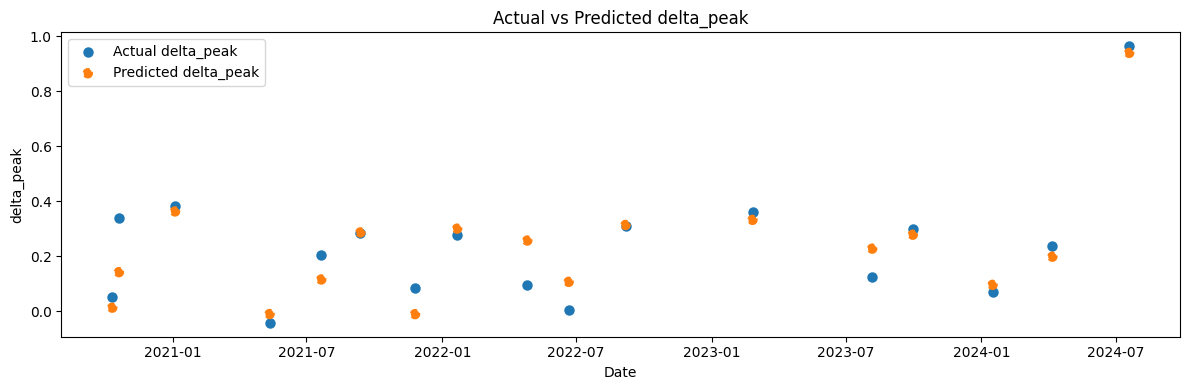

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


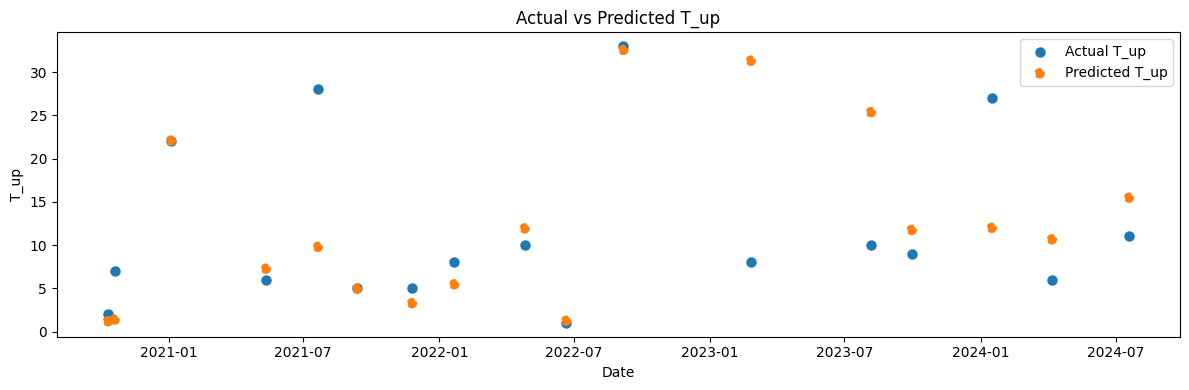

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


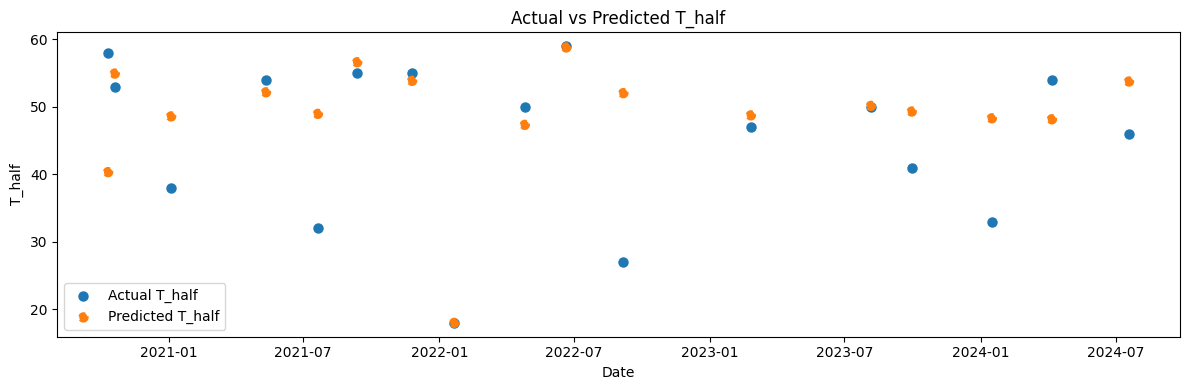

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


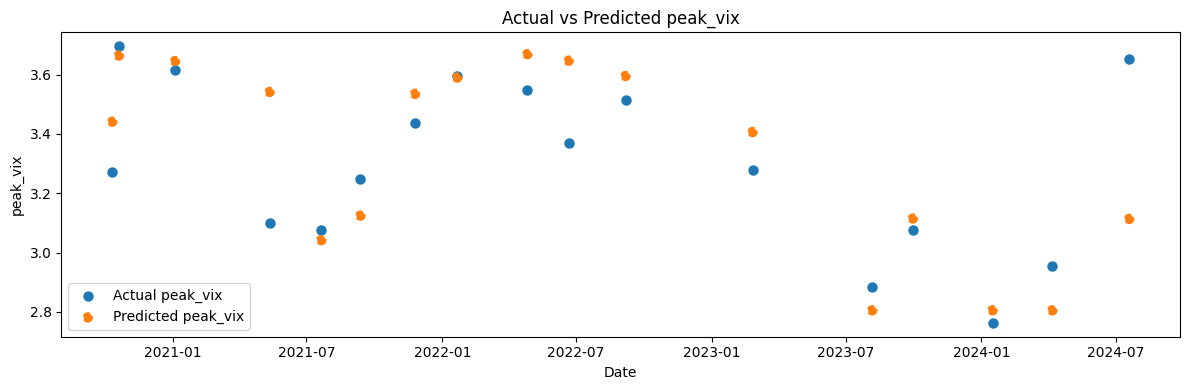

In [ ]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df.columns.difference(["delta_peak", "T_up", "T_half", 'peak_vix', 'spike5d'])

X_full_test = arc_df.reindex(columns=feature_cols)
X_full_test = X_full_test.fillna(0)

dates = arc_df.index         # x‑axis

models = {
    "delta_peak": joblib.load("mlp_delta_peak.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
}

for target, model in models.items():
    y_true_test = arc_df[target].values
    y_pred_test = model.predict(X_full_test)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# 1) Prepare your inputs & models (as you already have)
feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half", "delta_peak", 'spike5d'])
X_full       = arc_df[feature_cols].values
dates        = arc_df.index

models = {
    "peak_vix":   joblib.load("mlp_peak_vix.pkl"),
    "T_up":       joblib.load("mlp_T_up.pkl"),
    "T_half":     joblib.load("mlp_T_half.pkl"),
    "delta_peak": joblib.load("mlp_delta_peak.pkl"),
}

# 2) Build the predictions DataFrame
pred_df = pd.DataFrame(index=dates)

for target, model in models.items():
    y_pred = model.predict(X_full)
    pred_df[f"nn_{target}"] = y_pred

# 3) (Optional) peek at the first few rows
print(pred_df.head())

# 4) (Optional) join back to your original DataFrame
arc_df_with_nn = arc_df.join(pred_df)


            nn_peak_vix    nn_T_up  nn_T_half  nn_delta_peak
date_start                                                  
2020-10-11     3.441320   1.194561  40.335558       0.013309
2020-10-20     3.664276   1.379296  54.935856       0.142314
2021-01-04     3.645613  22.085439  48.591826       0.362876
2021-05-12     3.541687   7.270662  52.165890      -0.009796
2021-07-21     3.042114   9.787970  48.968585       0.115746


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


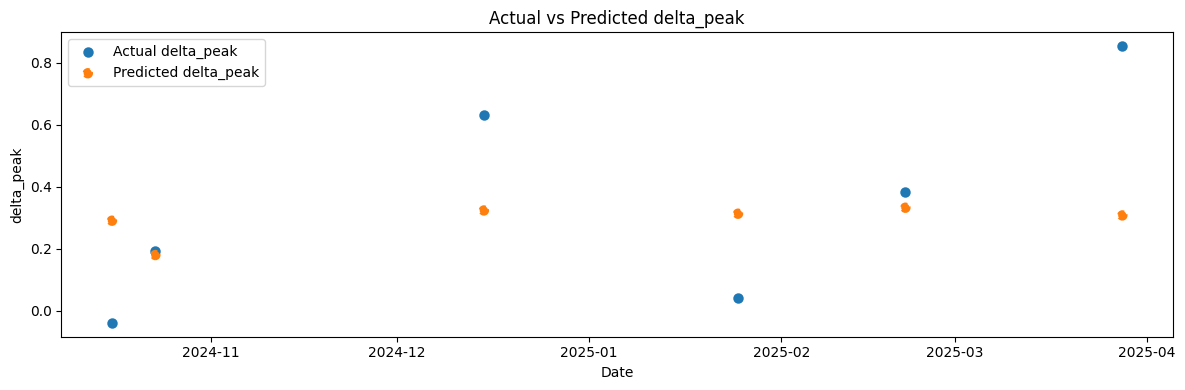

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


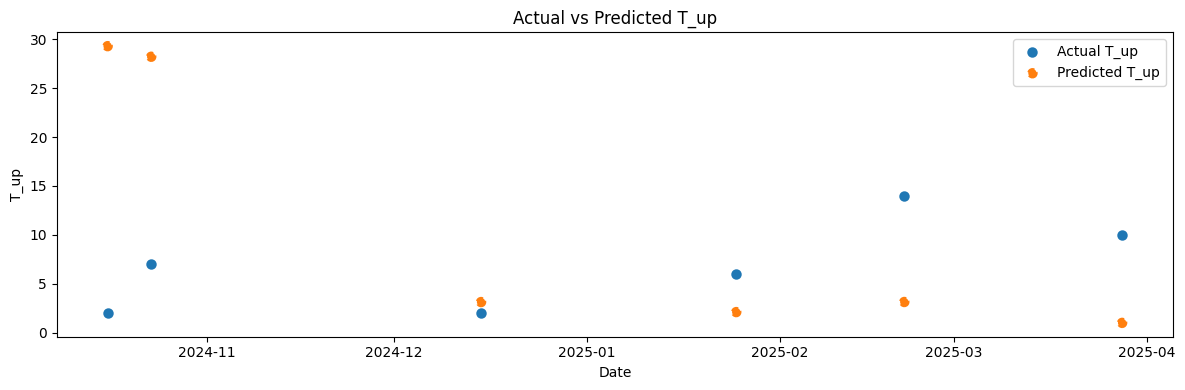

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


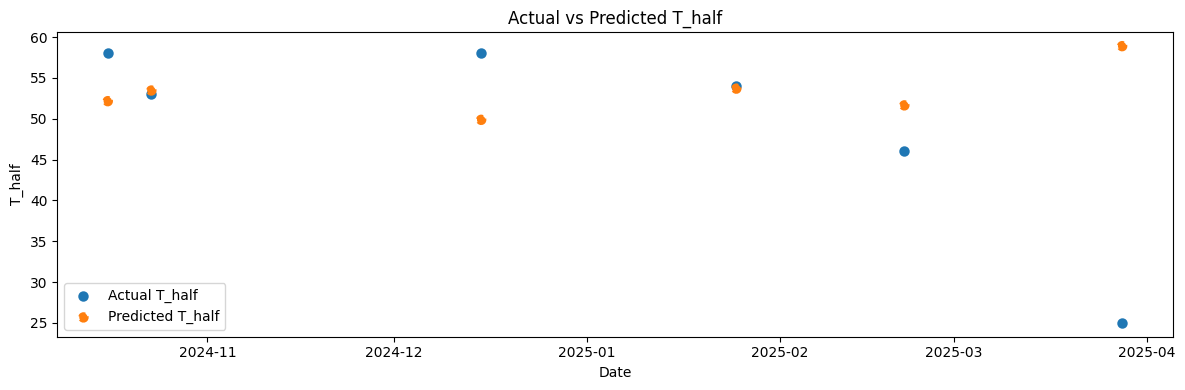

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


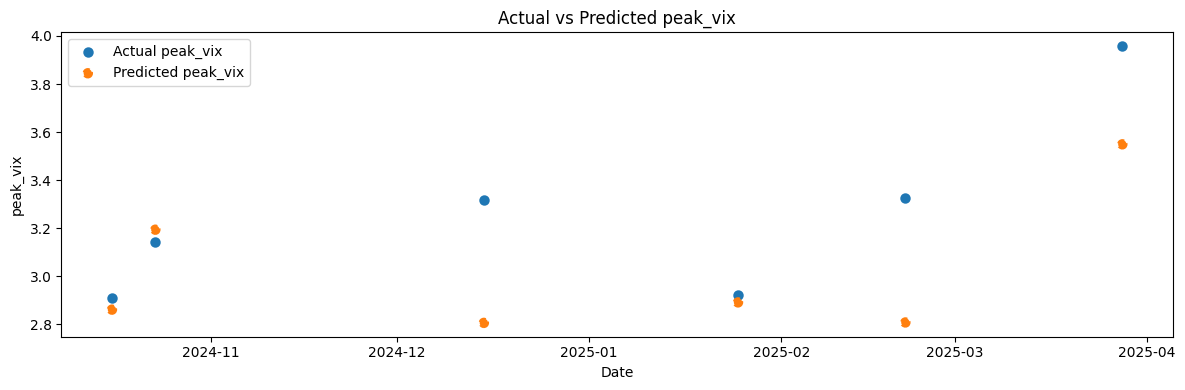

In [ ]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df.columns.difference(["delta_peak", "T_up", "T_half", 'peak_vix', 'spike5d'])

X_full_test = arc_df_test.reindex(columns=feature_cols)
X_full_test = X_full_test.fillna(0)

dates = arc_df_test.index         # x‑axis

models = {
    "delta_peak": joblib.load("mlp_delta_peak.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
}

pred_df_test = pd.DataFrame(index=dates)


# 4) (Optional) join back to your original DataFrame
arc_df_with_nn = arc_df.join(pred_df)

for target, model in models.items():
    y_true_test = arc_df_test[target].values
    y_pred_test = model.predict(X_full_test)
    pred_df_test[f"nn_{target}"] = y_pred_test


    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [397]:
pred_df_test.tail()
arc_df_with_nn_test = arc_df_test.join(pred_df_test)


In [398]:
arc_df_with_nn_test.tail()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob,delta_peak,spike5d,nn_delta_peak,nn_T_up,nn_T_half,nn_peak_vix
date_start,,,,,,,,,,,,,,,,,,,,,
2024-10-23,3.142427,2.948641,7.0,53.0,-0.157935,-0.975736,40.0,-0.038889,-0.971612,60.0,...,2.875,10.260013,-3.000000,0.5000,0.193786,0,0.179565,28.216087,53.455375,3.194248
2024-12-15,3.318540,2.687167,2.0,58.0,-0.003263,-0.973524,20.0,-0.137889,-0.973524,48.0,...,60.625,31.185791,0.071429,0.7700,0.631373,1,0.323421,3.130950,49.868585,2.806680
2025-01-25,2.924236,2.884801,6.0,54.0,0.117867,-0.971038,7.0,0.201732,-0.680292,15.0,...,8.500,15.212777,-0.454545,0.5000,0.039436,0,0.312933,2.105389,53.689452,2.891840
2025-02-21,3.327192,2.943386,14.0,46.0,-0.115498,-0.975739,49.0,-0.161775,-0.971196,74.0,...,29.750,17.458113,-0.519231,0.7600,0.383806,1,0.332279,3.138071,51.637775,2.808399
2025-03-28,3.957570,3.103689,10.0,25.0,-0.162400,-0.970411,129.0,-0.077482,-0.974197,228.0,...,77.625,38.059868,-0.241758,0.7275,0.853880,1,0.307399,1.002487,58.890398,3.549302


because lack of data we narrow down feats

In [399]:
target = "peak_vix"
correlations = arc_df[feature_cols].corrwith(arc_df[target]).abs().sort_values(ascending=False)
top_features = correlations.head(5).index.tolist()


In [400]:
arc_df_test.tail()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob,delta_peak,spike5d
date_start,,,,,,,,,,,,,,,,,,,,,
2024-10-23,3.142427,2.948641,7.0,53.0,-0.157935,-0.975736,40.0,-0.038889,-0.971612,60.0,...,-0.787686,2.925916,0.030137,-0.005889,2.875,10.260013,-3.000000,0.5000,0.193786,0
2024-12-15,3.318540,2.687167,2.0,58.0,-0.003263,-0.973524,20.0,-0.137889,-0.973524,48.0,...,-1.805063,2.649820,0.027714,0.013055,60.625,31.185791,0.071429,0.7700,0.631373,1
2025-01-25,2.924236,2.884801,6.0,54.0,0.117867,-0.971038,7.0,0.201732,-0.680292,15.0,...,-1.455344,2.731881,0.062000,0.063700,8.500,15.212777,-0.454545,0.5000,0.039436,0
2025-02-21,3.327192,2.943386,14.0,46.0,-0.115498,-0.975739,49.0,-0.161775,-0.971196,74.0,...,-2.284270,2.749504,0.063693,0.077759,29.750,17.458113,-0.519231,0.7600,0.383806,1
2025-03-28,3.957570,3.103689,10.0,25.0,-0.162400,-0.970411,129.0,-0.077482,-0.974197,228.0,...,-0.937639,2.911971,0.077219,0.039180,77.625,38.059868,-0.241758,0.7275,0.853880,1


In [401]:
arc_df.corr()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob,delta_peak,spike5d
peak_vix,1.000000,0.666949,-0.094667,-0.084381,0.243831,-0.056077,0.252126,-0.061174,0.015845,0.240218,...,-0.156684,0.615079,0.152236,0.303599,0.299932,0.458741,-0.053675,0.316541,0.460324,0.381546
vix0,0.666949,1.000000,-0.224093,0.103333,0.254944,0.104808,0.405835,0.111361,0.158383,0.405355,...,-0.223815,0.874696,0.276000,0.259997,0.311884,0.478031,-0.199015,-0.350996,-0.354454,-0.162499
T_up,-0.094667,-0.224093,1.000000,-0.715270,0.103054,-0.276441,-0.226810,0.236731,-0.257828,-0.215580,...,-0.010952,-0.145590,-0.088857,-0.074978,-0.197556,-0.299165,-0.029172,-0.017303,0.148191,-0.017058
T_half,-0.084381,0.103333,-0.715270,1.000000,0.020237,0.326406,0.304205,-0.033285,0.259838,0.289551,...,-0.220842,0.075765,0.018439,-0.123407,0.292111,0.429540,-0.077011,0.015253,-0.229010,-0.016410
summary_mean,0.243831,0.254944,0.103054,0.020237,1.000000,0.050996,-0.028253,0.250593,0.145937,0.139141,...,-0.326035,0.358679,-0.278249,-0.273830,0.327688,0.277497,-0.212762,-0.257657,0.002245,0.222465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentiment_dominance_std_7d,0.458741,0.478031,-0.299165,0.429540,0.277497,0.056705,0.653093,0.201436,0.015512,0.695047,...,0.143457,0.583705,-0.300445,-0.278750,0.853278,1.000000,-0.292034,-0.103723,0.006153,0.369688
sentiment_dominance_pctchg_7d,-0.053675,-0.199015,-0.029172,-0.077011,-0.212762,0.129927,-0.725222,0.007420,0.168738,-0.721925,...,-0.046710,-0.424182,0.401642,0.451272,-0.104632,-0.292034,1.000000,0.058968,0.169756,0.100821
early_spike_prob,0.316541,-0.350996,-0.017303,0.015253,-0.257657,-0.069173,-0.019112,-0.234302,-0.078393,-0.100359,...,-0.053012,-0.385060,0.107435,0.235286,-0.140722,-0.103723,0.058968,1.000000,0.815438,0.387298
delta_peak,0.460324,-0.354454,0.148191,-0.229010,0.002245,-0.195247,-0.167123,-0.209451,-0.168821,-0.181495,...,0.070031,-0.270255,-0.137789,0.071232,0.004809,0.006153,0.169756,0.815438,1.000000,0.672434


In [402]:
print(top_features)

['vix_zscore_pctchg_5d', 'vix_target_mean_2d', 'vix0', 'vix_target_mean_5d', 'vix_target_mean_7d']


In [403]:
top_features.append('sentiment_dominance_std_7d')
top_features.append('headline_min')
top_features.append('shock_neg_std_5d')


# XGBoost

In [ ]:
# ============================================================
# 0)  CONFIG & IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import joblib

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error

from xgboost import XGBRegressor

# --- assume arc_df and top_features are already defined ---
#arc_df["delta_peak"] = arc_df["peak_vix"] - arc_df["vix0"]
target_cols = ["delta_peak"]
quantiles   = [0.10, 0.50, 0.90]

# --- base & quantile-specific params ---
base_xgb_params = {
    "learning_rate":    0.07,
    "subsample":        0.7,
    "colsample_bytree": 0.7,
    "random_state":     42,
    "gamma":            0.05,
}

# --- CV setup & scorer ---
tscv       = TimeSeriesSplit(n_splits=5)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# --- define a search grid for XGB ---
param_grid_xgb = {
    "xgb__n_estimators":    [50,60,70,80,90,120, 130, 140, 150, 160, 170, 180],
    "xgb__max_depth":       [2, 3],
    "xgb__learning_rate":   [0.01, 0.07, 0.1, 0.005],
    "xgb__subsample":       [0.5, 0.7, 1.0],
    "xgb__colsample_bytree":[0.5, 0.7, 1.0],
    "xgb__reg_alpha":       [0.0, 0.6, 0.1, 0.5, 0.7, 1.0],
    "xgb__reg_lambda":      [0.0, 0.5, 1.0],
    "xgb__gamma":           [0.0, 0.05, 0.1, 0.2],
}

models = {}
cv_mae = {}

# ============================================================
# 1)  GRID-SEARCH + FINAL FIT FOR EACH TARGET & QUANTILE
# ============================================================
X_full = arc_df[top_features].values
y_full = arc_df[target_cols].values

for i, col in enumerate(target_cols):
    y = y_full[:, i]
    for q in quantiles:
        print(f"\n>>> Grid‐searching '{col}' at quantile {q:.2f}")

        # 1a) fixed quantile params
        fixed_params = base_xgb_params.copy()
        fixed_params.update({
            "objective":      "reg:quantileerror",
            "quantile_alpha": q
        })

        # 1b) pipeline: scale → XGB
        pipe = Pipeline([
            ("scale_X", StandardScaler()),
            ("xgb",      XGBRegressor(**fixed_params))
        ])

        # 1c) grid-search over other hyperparameters
        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid_xgb,
            cv=tscv,
            scoring=mae_scorer,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_full, y)

        # 1d) extract best params & CV score
        best_params = grid.best_params_
        best_score  = -grid.best_score_
        print(f"Best params for {col}@{q:.2f}: {best_params}")
        print(f"Best CV MAE: {best_score:.3f}")

        # 1e) re‐evaluate final MAE via CV
        final_mae = -np.mean(
            cross_validate(
                grid.best_estimator_, X_full, y,
                cv=tscv,
                scoring=mae_scorer,
                n_jobs=-1
            )["test_score"]
        )
        print(f"{col}@{q:.2f} | Final MAE (10-fold): {final_mae:.3f}")

        # 1f) save the best‐estimator
        models[(col, q)] = grid.best_estimator_
        joblib.dump(grid.best_estimator_, f"xgb_{col}_q{q:.2f}.pkl")

# ============================================================
# 2)  PREDICT FUNCTION WITH SPREAD (unchanged)
# ============================================================
def predict_new_arc(row_df: pd.DataFrame):
    preds = {}
    for col in target_cols:
        preds[col] = {}
        for q in quantiles:
            model = models[(col, q)]
            preds[col][q] = float(model.predict(row_df[top_features].values))
        preds[col]["spread"] = preds[col][quantiles[2]] - preds[col][quantiles[0]]
    return preds

print("\nDone. Models saved and CV MAEs recorded in cv_mae dict.")  



>>> Grid‐searching 'delta_peak' at quantile 0.10
Fitting 5 folds for each of 62208 candidates, totalling 311040 fits
Best params for delta_peak@0.10: {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0.0, 'xgb__learning_rate': 0.07, 'xgb__max_depth': 2, 'xgb__n_estimators': 130, 'xgb__reg_alpha': 0.7, 'xgb__reg_lambda': 0.0, 'xgb__subsample': 0.5}
Best CV MAE: 0.201
delta_peak@0.10 | Final MAE (10-fold): 0.201

>>> Grid‐searching 'delta_peak' at quantile 0.50
Fitting 5 folds for each of 62208 candidates, totalling 311040 fits
Best params for delta_peak@0.50: {'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.05, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 180, 'xgb__reg_alpha': 0.5, 'xgb__reg_lambda': 1.0, 'xgb__subsample': 0.7}
Best CV MAE: 0.150
delta_peak@0.50 | Final MAE (10-fold): 0.150

>>> Grid‐searching 'delta_peak' at quantile 0.90
Fitting 5 folds for each of 62208 candidates, totalling 311040 fits
Best params for delta_peak@0.90: {'xgb__colsample_bytree': 1.0

In [404]:
quantiles = [0.10, 0.50, 0.90]

            xgb_delta_peak_q0.10  xgb_delta_peak_q0.50  xgb_delta_peak_q0.90
date_start                                                                  
2020-10-11              0.051205              0.052261              0.240772
2020-10-20              0.260008              0.340659              0.341159
2021-01-04              0.158231              0.383842              0.384699
2021-05-12             -0.050904             -0.041941              0.291750
2021-07-21              0.122492              0.202897              0.311744


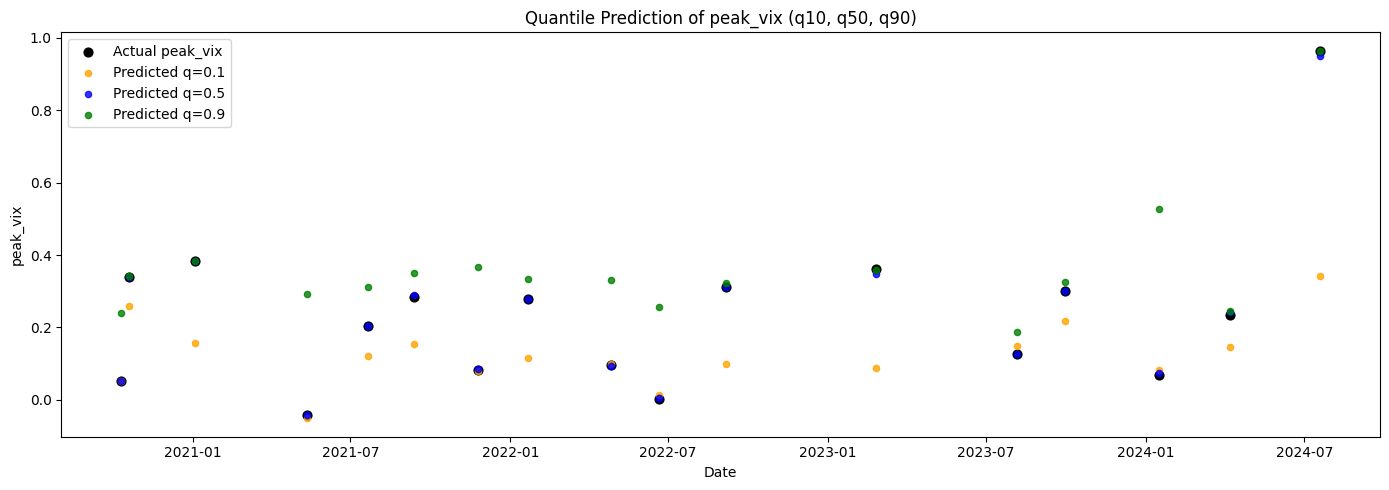

In [ ]:
import joblib
import matplotlib.pyplot as plt

# Load features and true values
feature_cols = arc_df.columns.difference(["delta_peak", "T_up", "T_half", 'peak_vix', 'spike5d'])
X_full       = arc_df[top_features].values
dates        = arc_df.index
y_true       = arc_df["delta_peak"].values

# Load quantile models
models = {
    q: joblib.load(f"xgb_delta_peak_q{q:.2f}.pkl")
    for q in quantiles
}

# Get predictions
preds = {
    q: models[q].predict(X_full)
    for q in quantiles
}

for q in quantiles:
    model = joblib.load(f"xgb_delta_peak_q{q:.2f}.pkl")
    arc_df_with_nn[f"xgb_delta_peak_q{q:.2f}"] = model.predict(X_full)

# Now arc_df_with_nn has nn_… columns plus xgb_delta_peak_q0.10, 0.50, 0.90
print(arc_df_with_nn.filter(like='xgb_delta_peak').head())

# Plot
plt.figure(figsize=(14, 5))
plt.scatter(dates, y_true, label="Actual peak_vix", color="black", s=40)

# Plot quantile dots
colors = {quantiles[0]: "orange", quantiles[1]: "blue", quantiles[2]: "green"}
for q in quantiles:
    plt.scatter(dates, preds[q], label=f"Predicted q={q:.1f}", color=colors[q], s=20, alpha=0.8)

plt.title("Quantile Prediction of peak_vix (q10, q50, q90)")
plt.xlabel("Date")
plt.ylabel("peak_vix")
plt.legend()
plt.tight_layout()
plt.show()


            xgb_delta_peak_q0.10  xgb_delta_peak_q0.50  xgb_delta_peak_q0.90
date_start                                                                  
2024-10-16              0.181454              0.325581              0.291958
2024-10-23              0.122332              0.104714              0.294211
2024-12-15              0.251822              0.368634              0.840289
2025-01-25              0.075364              0.139432              0.277841
2025-02-21              0.145211              0.161799              0.247110


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Stand

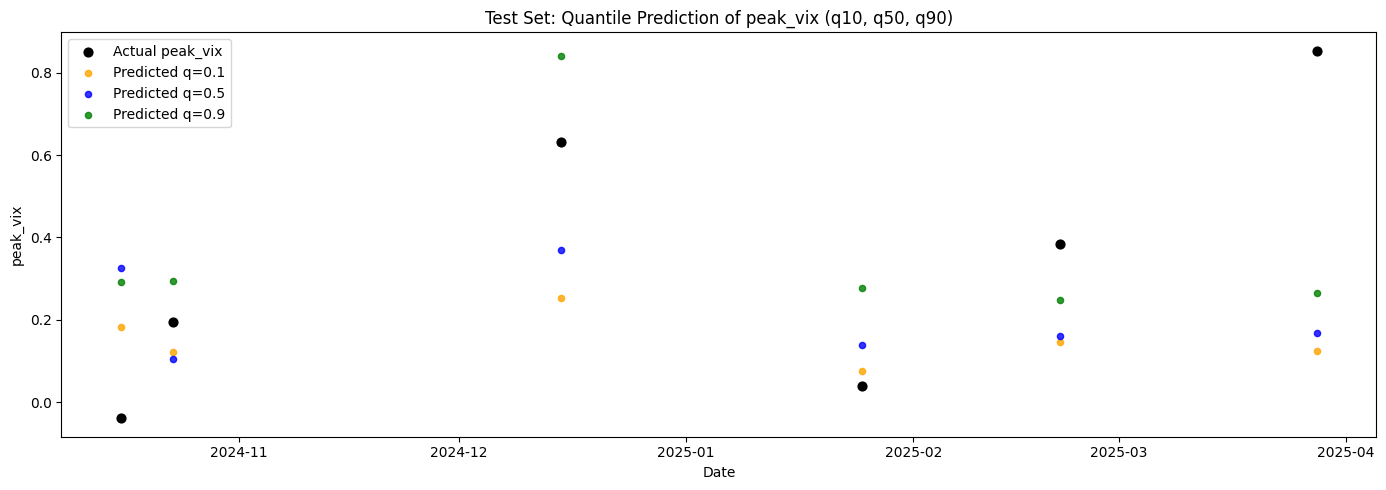

In [ ]:
import joblib
import matplotlib.pyplot as plt

# Load features and test dates
arc_df_test["delta_peak"] = arc_df_test["peak_vix"] - arc_df_test["vix0"]
feature_cols   = arc_df_test.columns.difference(["delta_peak", "T_up", "T_half", "peak_vix", 'spike5d'])
X_full_test = arc_df_test.reindex(columns=top_features).fillna(0)
dates_test     = arc_df_test.index
y_true_test    = arc_df_test["delta_peak"].values

# Quantiles and color map
colors = {quantiles[0]: "orange", quantiles[1]: "blue", quantiles[2]: "green"}

# Load quantile models for peak_vix
models = {
    q: joblib.load(f"xgb_delta_peak_q{q:.2f}.pkl")
    for q in quantiles
}

# Predict for each quantile
preds_test = {
    q: models[q].predict(X_full_test)
    for q in quantiles
}

for q in quantiles:
    model = joblib.load(f"xgb_delta_peak_q{q:.2f}.pkl")
    arc_df_with_nn_test[f"xgb_delta_peak_q{q:.2f}"] = model.predict(X_full_test)

# Now arc_df_with_nn has nn_… columns plus xgb_delta_peak_q0.10, 0.50, 0.90
print(arc_df_with_nn_test.filter(like='xgb_delta_peak').head())

# Plot
plt.figure(figsize=(14, 5))
plt.scatter(dates_test, y_true_test, label="Actual peak_vix", color="black", s=40)

for q in quantiles:
    plt.scatter(dates_test, preds_test[q], label=f"Predicted q={q:.1f}", color=colors[q], s=20, alpha=0.8)

plt.title("Test Set: Quantile Prediction of peak_vix (q10, q50, q90)")
plt.xlabel("Date")
plt.ylabel("peak_vix")

plt.legend()
plt.tight_layout()
plt.show()


we will now do a final model that takes the inputs from the other models for a final output

In [409]:
arc_df_test.head()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob,delta_peak,spike5d
date_start,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.910719,2.950212,2.0,58.0,-0.222685,-0.976018,47.0,-0.167496,-0.971121,51.0,...,NaN,2.974509,NaN,NaN,-3.000,NaN,NaN,0.50,-0.039493,0
2024-10-23,3.142427,2.948641,7.0,53.0,-0.157935,-0.975736,40.0,-0.038889,-0.971612,60.0,...,-0.787686,2.925916,0.030137,-0.005889,2.875,10.260013,-3.000000,0.50,0.193786,0
2024-12-15,3.318540,2.687167,2.0,58.0,-0.003263,-0.973524,20.0,-0.137889,-0.973524,48.0,...,-1.805063,2.649820,0.027714,0.013055,60.625,31.185791,0.071429,0.77,0.631373,1
2025-01-25,2.924236,2.884801,6.0,54.0,0.117867,-0.971038,7.0,0.201732,-0.680292,15.0,...,-1.455344,2.731881,0.062000,0.063700,8.500,15.212777,-0.454545,0.50,0.039436,0
2025-02-21,3.327192,2.943386,14.0,46.0,-0.115498,-0.975739,49.0,-0.161775,-0.971196,74.0,...,-2.284270,2.749504,0.063693,0.077759,29.750,17.458113,-0.519231,0.76,0.383806,1


In [410]:
top_features

['vix_zscore_pctchg_5d',
 'vix_target_mean_2d',
 'vix0',
 'vix_target_mean_5d',
 'vix_target_mean_7d',
 'sentiment_dominance_std_7d',
 'headline_min',
 'shock_neg_std_5d']

In [411]:
# ============================================================
# Re-train & save your meta-models as full Pipelines
# (so scaling + NN are bundled together for both targets)
# ============================================================

import numpy as np
import pandas as pd
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# 0) YOUR predefined top features and exclusion list
"""top_features = [
    'shock_neg_std_7d',
    'shock_neg_std_5d',
    'shock_neg_std_2d',
    'mean_sentiment_decay',
    'shock_neg_pctchg_5d',
    'sentiment_dominance_std_7d',
    'headline_min'
]"""
excluded = {"peak_vix", "delta_peak", "T_up", "T_half", "spike5d"}

# 1) Build base_features from top_features (only if present & not excluded)
base_features = [
    f for f in top_features
    if f in arc_df_with_nn.columns and f not in excluded
]

# 2) Build prefix_features: any nn_… or xgb_delta_peak… (and not excluded)
prefix_features = [
    col for col in arc_df_with_nn.columns
    if (col.startswith("nn_") or col.startswith("xgb_delta_peak"))
       and col not in excluded
]

# 3) Final meta‐feature lists for both pipelines
meta_features_delta = base_features + prefix_features
meta_features_peak  = base_features + prefix_features

# --- 4) Build training matrices ---
X_meta_delta = arc_df_with_nn[meta_features_delta]
y_delta      = arc_df_with_nn["delta_peak"]

X_meta_peak  = arc_df_with_nn[meta_features_peak]
y_peak       = arc_df_with_nn["peak_vix"]


In [412]:
X_meta_delta.shape

(17, 15)

In [3735]:

# --- 5) Define & train the delta_peak meta‐Pipeline ---
meta_delta_pipe = Pipeline([
    ("scale_meta", StandardScaler()),
    ("meta_nn", MLPRegressor(
        hidden_layer_sizes=(25, 27),
        activation='tanh',
        solver="adam",
        max_iter=10_000,
        random_state=38,
        batch_size=3,
        alpha=0.6,
        early_stopping=True
    ))
])
meta_delta_pipe.fit(X_meta_delta, y_delta)
joblib.dump(meta_delta_pipe, "meta_delta_pipe.pkl")

# --- 6) Define & train the peak_vix meta‐Pipeline ---
meta_peak_pipe = Pipeline([
    ("scale_meta", StandardScaler()),
    ("meta_nn", MLPRegressor(
        hidden_layer_sizes=(7,18),
        activation="tanh",
        solver="adam",
        max_iter=10_000,
        random_state=42,
        batch_size=3,
        alpha=0.1,
        early_stopping=True
    ))
])
meta_peak_pipe.fit(X_meta_peak, y_peak)
joblib.dump(meta_peak_pipe, "meta_peak_pipe.pkl")

['meta_peak_pipe.pkl']

In [3736]:
arc_df_with_nn_test = arc_df_with_nn_test.reindex(columns=arc_df_with_nn.columns)

In [3737]:
arc_df_with_nn_test = arc_df_with_nn_test

In [3738]:
arc_df_with_nn_test.head()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,early_spike_prob,delta_peak,spike5d,nn_peak_vix,nn_T_up,nn_T_half,nn_delta_peak,xgb_delta_peak_q0.10,xgb_delta_peak_q0.50,xgb_delta_peak_q0.90
date_start,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.910719,2.950212,2.0,58.0,-0.222685,-0.976018,47.0,-0.167496,-0.971121,51.0,...,0.50,-0.039493,0,2.861769,29.297928,52.153446,0.290367,0.181454,0.325581,0.291958
2024-10-23,3.142427,2.948641,7.0,53.0,-0.157935,-0.975736,40.0,-0.038889,-0.971612,60.0,...,0.50,0.193786,0,3.194248,28.216087,53.455375,0.179565,0.122332,0.104714,0.294211
2024-12-15,3.318540,2.687167,2.0,58.0,-0.003263,-0.973524,20.0,-0.137889,-0.973524,48.0,...,0.77,0.631373,1,2.806680,3.130950,49.868585,0.323421,0.251822,0.368634,0.840289
2025-01-25,2.924236,2.884801,6.0,54.0,0.117867,-0.971038,7.0,0.201732,-0.680292,15.0,...,0.50,0.039436,0,2.891840,2.105389,53.689452,0.312933,0.075364,0.139432,0.277841
2025-02-21,3.327192,2.943386,14.0,46.0,-0.115498,-0.975739,49.0,-0.161775,-0.971196,74.0,...,0.76,0.383806,1,2.808399,3.138071,51.637775,0.332279,0.145211,0.161799,0.247110


In [3739]:
excluded = {"peak_vix", "delta_peak", "T_up", "T_half", "spike5d"}

# 1) Build base_features from top_features (only if present & not excluded)
base_features_test = [
    f for f in top_features
    if f in arc_df_with_nn_test.columns and f not in excluded
]

# 2) Build prefix_features: any nn_… or xgb_delta_peak… (and not excluded)
prefix_features_test = [
    col for col in arc_df_with_nn_test.columns
    if (col.startswith("nn_") or col.startswith("xgb_delta_peak"))
       and col not in excluded
]

# 3) Final meta‐feature lists for both pipelines
meta_features_delta_test = base_features_test + prefix_features_test
meta_features_peak_test  = base_features_test + prefix_features_test

# --- 4) Build training matrices ---
X_meta_delta_test = arc_df_with_nn_test[meta_features_delta_test]
y_delta_test      = arc_df_with_nn_test["delta_peak"]

X_meta_peak_test  = arc_df_with_nn_test[meta_features_peak_test]
y_peak_test       = arc_df_with_nn_test["peak_vix"]


#X_meta_delta_test = X_meta_delta_test.reindex(columns=X_meta_delta.columns)
#X_meta_peak_test  = X_meta_peak_test .reindex(columns=X_meta_peak.columns)

# (optionally) if you also want y’s to line up to the same index:
#y_delta_test = y_delta_test.reindex(X_meta_delta_test.index)
#y_peak_test  = y_peak_test .reindex(X_meta_peak_test.index)

In [3740]:
X_meta_delta_test = X_meta_delta_test.dropna()
X_meta_peak_test = X_meta_peak_test.dropna()


In [3741]:
X_meta_delta_test

,vix_zscore_pctchg_5d,vix_target_mean_2d,vix0,vix_target_mean_5d,vix_target_mean_7d,sentiment_dominance_std_7d,headline_min,shock_neg_std_5d,nn_peak_vix,nn_T_up,nn_T_half,nn_delta_peak,xgb_delta_peak_q0.10,xgb_delta_peak_q0.50,xgb_delta_peak_q0.90
date_start,,,,,,,,,,,,,,,
2024-10-23,-1.336236,2.923044,2.948641,2.913768,2.925916,10.260013,-0.971612,0.021135,3.194248,28.216087,53.455375,0.179565,0.122332,0.104714,0.294211
2024-12-15,-1.906191,2.666576,2.687167,2.648914,2.649820,31.185791,-0.973524,0.007667,2.806680,3.130950,49.868585,0.323421,0.251822,0.368634,0.840289
2025-01-25,-1.517966,2.764061,2.884801,2.738494,2.731881,15.212777,-0.680292,0.058289,2.891840,2.105389,53.689452,0.312933,0.075364,0.139432,0.277841
2025-02-21,-3.329848,2.792990,2.943386,2.762053,2.749504,17.458113,-0.971196,0.004168,2.808399,3.138071,51.637775,0.332279,0.145211,0.161799,0.247110
2025-03-28,-0.964513,2.970511,3.103689,2.912608,2.911971,38.059868,-0.974197,0.003805,3.549302,1.002487,58.890398,0.307399,0.123409,0.169020,0.264159


In [3742]:
dates_test

DatetimeIndex(['2024-10-16', '2024-10-23', '2024-12-15', '2025-01-25',
               '2025-02-21', '2025-03-28'],
              dtype='datetime64[ns]', name='date_start', freq=None)

In [3743]:
dates_test_adj_delta = dates_test[dates_test.isin(X_meta_delta_test.index)]
dates_test_adj_peak = dates_test[dates_test.isin(X_meta_peak_test.index)]
y_delta_test = y_delta_test[y_delta_test.index.isin(dates_test_adj_delta)]
y_peak_test = y_peak_test[y_peak_test.index.isin(dates_test_adj_peak)]

In [3744]:
print(dates_test_adj_delta.shape)

(5,)


In [3745]:
y_delta_test

date_start
2024-10-23    0.193786
2024-12-15    0.631373
2025-01-25    0.039436
2025-02-21    0.383806
2025-03-28    0.853880
Name: delta_peak, dtype: float64

In [3746]:
print(dates_test_adj.shape)
print(y_delta_test.shape)


(6,)
(5,)


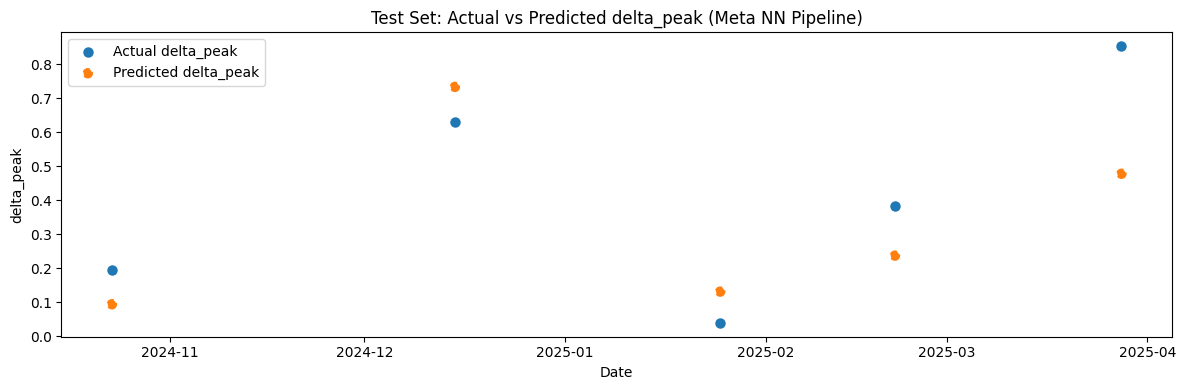

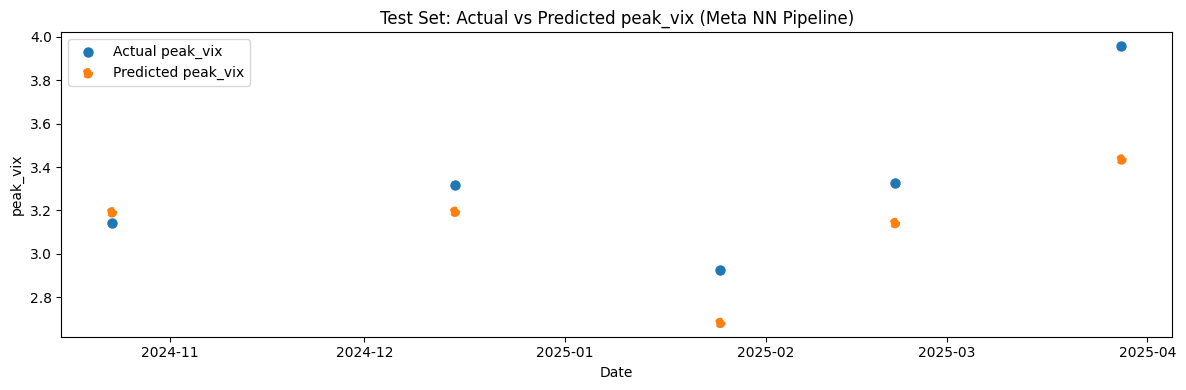

In [ ]:

# --- 8) Load pipelines & predict ---
delta_pipe = joblib.load("meta_delta_pipe.pkl")
peak_pipe  = joblib.load("meta_peak_pipe.pkl")

y_pred_delta = delta_pipe.predict(X_meta_delta_test)
y_pred_peak  = peak_pipe.predict(X_meta_peak_test)

# --- 9a) Plot delta_peak ---
plt.figure(figsize=(12, 4))
plt.scatter(dates_test_adj_delta, y_delta_test, label="Actual delta_peak", linewidth=1.5)
plt.scatter(dates_test_adj_delta, y_pred_delta, label="Predicted delta_peak", linestyle="--", linewidth=1.5)
plt.title("Test Set: Actual vs Predicted delta_peak (Meta NN Pipeline)")
plt.xlabel("Date")
plt.ylabel("delta_peak")
plt.legend()
plt.tight_layout()
plt.show()

# --- 9b) Plot peak_vix ---
plt.figure(figsize=(12, 4))
plt.scatter(dates_test_adj_peak, y_peak_test, label="Actual peak_vix", linewidth=1.5)
plt.scatter(dates_test_adj_peak, y_pred_peak, label="Predicted peak_vix", linestyle="--", linewidth=1.5)
plt.title("Test Set: Actual vs Predicted peak_vix (Meta NN Pipeline)")
plt.xlabel("Date")
plt.ylabel("peak_vix")
plt.legend()
plt.tight_layout()
plt.show()

In [3748]:
print(np.exp(y_pred_peak))
print(np.exp(y_peak_test.values))
print(np.exp(X_meta_peak_test['vix0'].values))

[24.3100337  24.37124451 14.59574313 23.13471565 31.01926784]
[23.15999985 27.62000084 18.62000084 27.86000061 52.33000183]
[19.07999992 14.68999958 17.89999962 18.97999954 22.28000069]


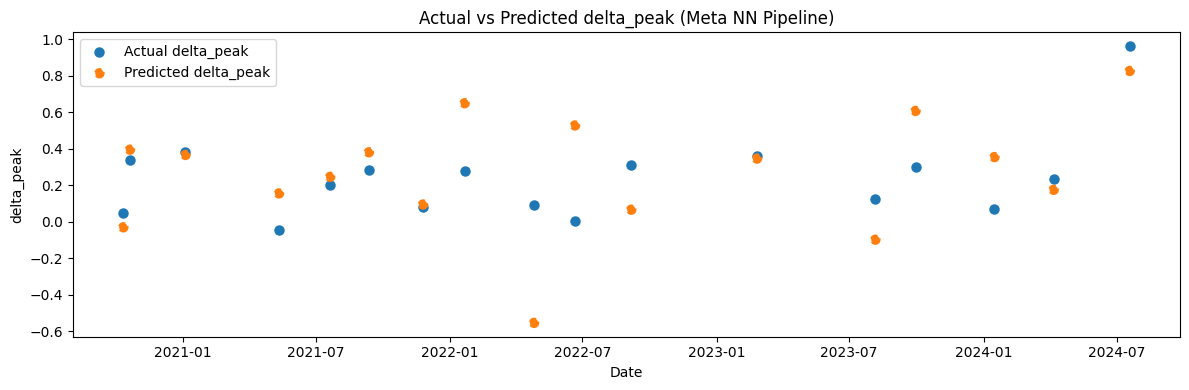

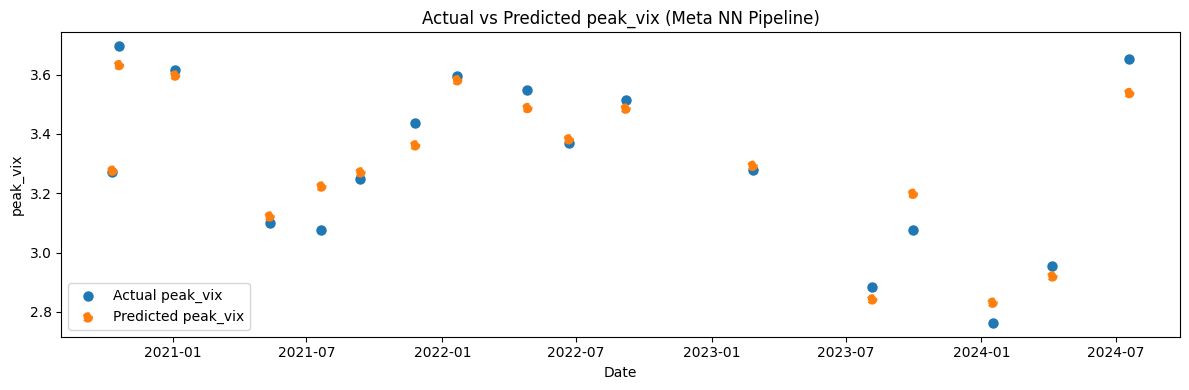

In [ ]:
# 1) EXACTLY the same meta‐feature lists as in training
excluded = {"peak_vix", "delta_peak", "T_up", "T_half", 'spike5d'}

meta_features_delta = [
    col for col in arc_df_with_nn.columns
    if col not in excluded and (col.startswith("nn_") or col.startswith("xgb_delta_peak"))
]
meta_features_peak = [
    col for col in arc_df_with_nn.columns
    if col not in excluded and col.startswith("nn_")
]

# 3) Load the full pipelines you trained & saved
delta_pipe = joblib.load("meta_delta_pipe.pkl")
peak_pipe  = joblib.load("meta_peak_pipe.pkl")

# 4) Predict (scaling happens automatically inside the pipeline)
y_pred_delta = delta_pipe.predict(X_meta_delta)
y_pred_peak  = peak_pipe.predict(X_meta_peak)

# 5) Plot exactly as before...
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.scatter(dates, y_delta, label="Actual delta_peak", linewidth=1.5)
plt.scatter(dates, y_pred_delta, label="Predicted delta_peak", linestyle="--", linewidth=1.5)
plt.title("Actual vs Predicted delta_peak (Meta NN Pipeline)")
plt.xlabel("Date"); plt.ylabel("delta_peak")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(12, 4))
plt.scatter(dates, y_peak, label="Actual peak_vix", linewidth=1.5)
plt.scatter(dates, y_pred_peak, label="Predicted peak_vix", linestyle="--", linewidth=1.5)
plt.title("Actual vs Predicted peak_vix (Meta NN Pipeline)")
plt.xlabel("Date"); plt.ylabel("peak_vix")
plt.legend(); plt.tight_layout(); plt.show()


# Test Set on models (regime + panic probability)


In [3372]:
vix_windows_df_train.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2019-08-04,3.202340,2.827905,3.048799,2.863343,3.053057,2.916148,2.961141,2.961141,3.011113,2.962692,...,2.696652,2.696652,2.665838,2.837908,3.326833,3.509154,3.736240,3.856510,3.987131,0.2925
2020-02-25,3.509154,3.736240,3.856510,3.987131,4.415099,4.276666,4.190261,4.158102,4.182661,4.044454,...,3.252311,3.242202,3.259634,3.275634,3.251537,3.324316,3.324316,3.290638,3.352707,0.8675
2020-06-11,3.516607,3.510650,3.558771,3.445852,3.521644,3.547604,3.415429,3.354106,3.330059,3.251924,...,3.260785,3.273364,3.294725,3.310908,3.373484,3.373484,3.373484,3.379293,3.355153,NaN
2020-10-11,3.221672,3.260785,3.273364,3.294725,3.310908,3.373484,3.373484,3.373484,3.379293,3.355153,...,3.052585,3.057768,3.034472,3.058707,3.058707,3.058707,3.029167,3.103241,3.114404,NaN
2020-10-20,3.355153,3.336125,3.316003,3.480009,3.480009,3.480009,3.507058,3.695855,3.626738,3.638112,...,3.148882,3.207613,3.207613,3.207613,3.130700,3.113515,3.087856,3.071303,3.225255,NaN


In [269]:
print(results.params)

p[0->0]     0.975581
p[1->0]     0.029384
const[0]   -0.653526
const[1]    0.560605
x1[0]       0.040080
x1[1]      -0.109190
x2[0]      -0.053259
x2[1]       0.131607
sigma2      0.299374
dtype: float64


In [5083]:
per_markov_test = 0.04
# 1. After fitting on training set
train_params = results.params
k=2

X_test = test_df[selected_features]
y_test = test_df['vix_ewm_zscore']

# 3. Define same model on test data
model_test = MarkovRegression(
    endog=y_test,
    exog=X_test,
    k_regimes=k,
    switching_variance=False
)

# 4. Apply training parameters with FILTER (real-time regime inference)
results_test = model_test.filter(train_params)

# 5. Extract real-time regime (filtered) — sensitive threshold
if k == 3:
    test_df['regime_t_raw'] = results_test.filtered_marginal_probabilities.idxmax(axis=1)
    test_df['regime_t'] = test_df['regime_t_raw'].apply(lambda r: 1 if r in [2] else 0) #[1,2]
else:
    test_df['regime_t_raw'] = results_test.filtered_marginal_probabilities[1]
    test_df['regime_t'] = test_df['regime_t_raw'].apply(lambda p: 1 if p >= per_markov_test else 0)

# 6. Predict probability of panic regime tomorrow using classifier (NO regime_t)
test_df['panic_prob_t+1'] = clf.predict_proba(X_test)[:, 1]

# 7. (Optional) Align as prediction for tomorrow
test_df['vix_target_t+1'] = test_df['vix_target'].shift(-1)



/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_20542/2000618808.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['regime_t_raw'] = results_test.filtered_marginal_probabilities[1]
/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_20542/2000618808.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [280]:
test_df.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,regime_t_raw,regime_t,panic_prob_t+1,vix_target_t+1
date,,,,,,,,,,,,,,,,,,,,,
2025-04-28,-0.096253,-0.975737,90,0.048906,-0.971171,192,50,-0.023674,-0.973454,344,...,-0.579713,32.387000,32.387000,30.145885,6.950796,0.322426,0.002044,0,0.453454,3.185112
2025-04-29,-0.256989,-0.975858,247,-0.174279,-0.973403,337,192,-0.215634,-0.974631,619,...,-0.677153,32.482667,32.482667,30.296645,6.748147,0.323944,0.001323,0,0.482429,3.206803
2025-04-30,-0.257138,-0.975998,380,-0.172480,-0.976034,439,318,-0.214809,-0.976016,816,...,-0.577658,32.545667,32.545667,30.441743,6.550984,0.321161,0.002020,0,0.354482,3.202746
2025-05-01,-0.214649,-0.976830,256,-0.123903,-0.974128,371,189,-0.169276,-0.975479,675,...,-0.565690,32.626333,32.626333,30.582684,6.359608,0.321348,0.002190,0,0.434201,3.121483
2025-05-02,-0.053660,-0.976696,177,-0.039443,-0.973332,387,147,-0.046552,-0.975014,744,...,-0.794454,32.720667,22.680000,30.072834,6.460225,-1.144362,0.000781,0,0.451695,NaN


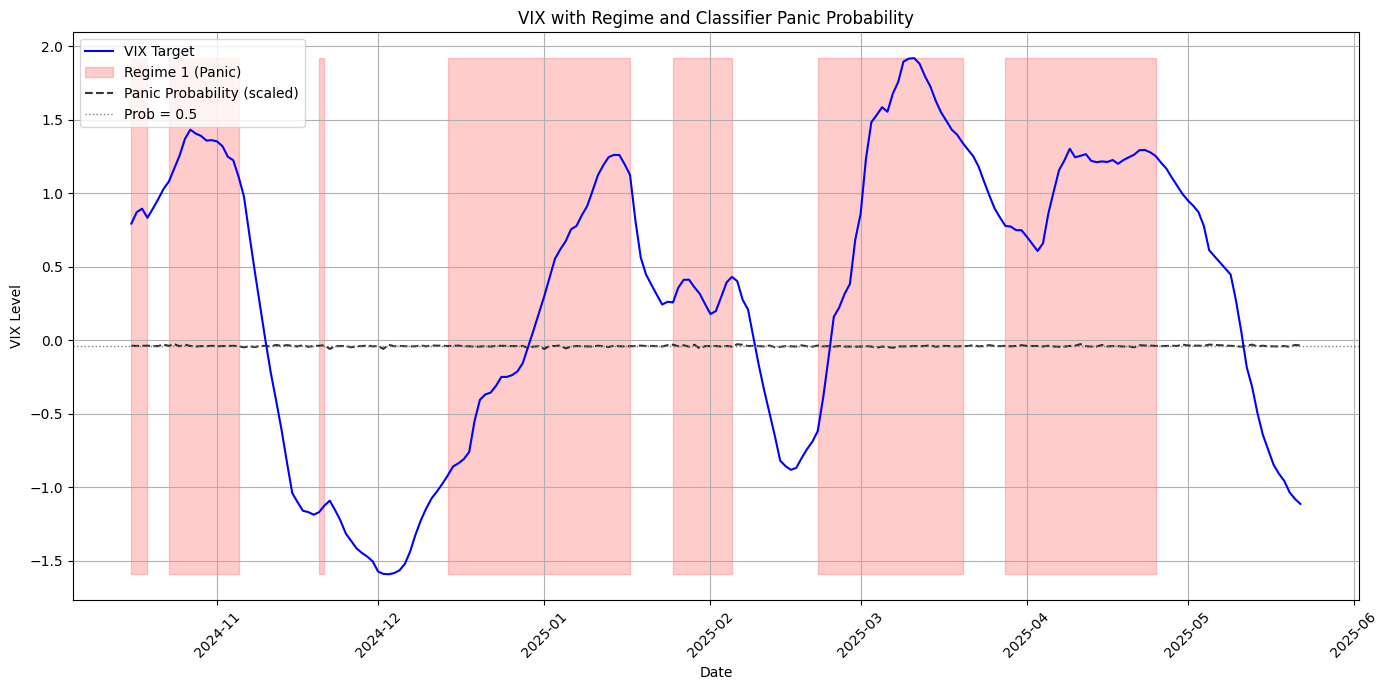

In [5085]:
import matplotlib.pyplot as plt

# Assumes test_df already has:
# - 'vix_target_t+1' (VIX values)
# - 'regime_t' (real-time inferred regime: 0 or 1)
# - 'panic_prob_t+1' (classifier probability of panic tomorrow)

plt.figure(figsize=(14, 7))

# 1. Plot VIX
plt.plot(test_df.index, test_df["vix_ewm_zscore_flat"], label="VIX Target", color="blue")

# 2. Shade areas where regime is 1 (panic)
plt.fill_between(
    test_df.index,
    test_df["vix_ewm_zscore_flat"].min(),
    test_df["vix_ewm_zscore_flat"].max(),
    where=test_df["regime_t"] == 1,
    color="red",
    alpha=0.2,
    label="Regime 1 (Panic)"
)

# 3. Plot panic probability (scaled for visibility)
scaled_prob = test_df["panic_prob_t+1"] * (test_df["vix_ewm_zscore_flat"].max() - 2)
plt.plot(test_df.index, scaled_prob, label="Panic Probability (scaled)", color="black", linestyle="--", alpha=0.8)

# Optional: Add threshold line for prob=0.5 scaled to same scale
plt.axhline(y=0.5 * (test_df["vix_ewm_zscore_flat"].max() - 2), color="gray", linestyle=":", linewidth=1, label="Prob = 0.5")

# Finalize
plt.title("VIX with Regime and Classifier Panic Probability")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

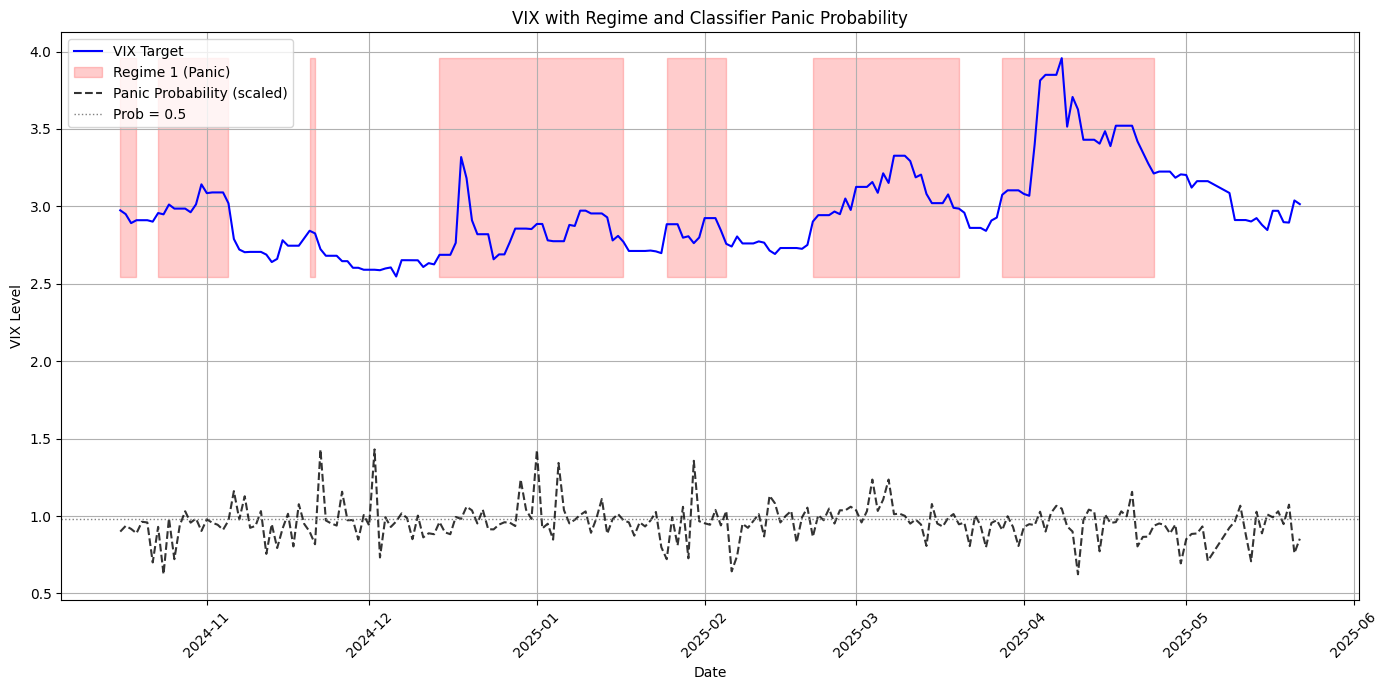

In [5086]:
import matplotlib.pyplot as plt

# Assumes test_df already has:
# - 'vix_target_t+1' (VIX values)
# - 'regime_t' (real-time inferred regime: 0 or 1)
# - 'panic_prob_t+1' (classifier probability of panic tomorrow)

plt.figure(figsize=(14, 7))

# 1. Plot VIX
plt.plot(test_df.index, test_df["vix_target"], label="VIX Target", color="blue")

# 2. Shade areas where regime is 1 (panic)
plt.fill_between(
    test_df.index,
    test_df["vix_target"].min(),
    test_df["vix_target"].max(),
    where=test_df["regime_t"] == 1,
    color="red",
    alpha=0.2,
    label="Regime 1 (Panic)"
)

# 3. Plot panic probability (scaled for visibility)
scaled_prob = test_df["panic_prob_t+1"] * (test_df["vix_target"].max() - 2)
plt.plot(test_df.index, scaled_prob, label="Panic Probability (scaled)", color="black", linestyle="--", alpha=0.8)

# Optional: Add threshold line for prob=0.5 scaled to same scale
plt.axhline(y=0.5 * (test_df["vix_target"].max() - 2), color="gray", linestyle=":", linewidth=1, label="Prob = 0.5")

# Finalize
plt.title("VIX with Regime and Classifier Panic Probability")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [284]:
test_df.head()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_ewm_zscore,mean_prev,vix_flat_abs,ewm_mean_flat,ewm_std_flat,vix_ewm_zscore_flat,regime_t_raw,regime_t,panic_prob_t+1,vix_target_t+1
date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,-0.222685,-0.976018,47,-0.167496,-0.971121,51,40,-0.195090,-0.973569,95,...,0.109050,18.521333,18.521333,18.115315,1.097978,0.369787,0.591054,1,0.459381,2.950212
2024-10-17,-0.224310,-0.974795,34,-0.272826,-0.973557,36,40,-0.248568,-0.974176,78,...,-0.091281,18.602667,18.602667,18.146757,1.068928,0.426511,0.495364,1,0.478097,2.892037
2024-10-18,-0.248795,-0.973813,27,-0.209752,-0.970884,28,22,-0.229274,-0.972349,51,...,-0.549641,18.652667,18.652667,18.179396,1.041571,0.454381,0.078373,1,0.468317,2.910719
2024-10-19,0.076486,-0.904173,5,-0.051621,-0.936994,13,4,0.012432,-0.920584,25,...,-0.379178,18.646000,18.646000,18.209500,1.014136,0.430416,0.020657,0,0.453847,2.910719
2024-10-20,-0.148248,-0.970708,11,0.232043,-0.928842,25,4,0.041897,-0.949775,43,...,-0.364995,18.714000,18.714000,18.242048,0.988944,0.477228,0.009278,0,0.491870,2.910719


In [285]:
classification_df_test = macro_utils.identify_sustained_regimes_and_transitions(test_df)

/Users/dsuniaga/Documents/GitHub/VIXNLP/finnhub_news/macro_utils.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['regime_group'] = (classification_df['regime_t'] != classification_df['regime_t'].shift()).cumsum()
/Users/dsuniaga/Documents/GitHub/VIXNLP/finnhub_news/macro_utils.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['is_sustained_regime1'] = classification_df['regime_group'].isin(valid_groups)
/Users/dsuniaga/Documents/GitHub/VIXNLP/finnhub_news/macro_

In [286]:
classification_df_test

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,ewm_std_flat,vix_ewm_zscore_flat,regime_t_raw,regime_t,panic_prob_t+1,vix_target_t+1,regime_group,is_sustained_regime1,regime_t-1,is_transition
date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,-0.222685,-0.976018,47,-0.167496,-0.971121,51,40,-0.195090,-0.973569,95,...,1.097978,0.369787,0.591054,1,0.459381,2.950212,1,True,NaN,False
2024-10-17,-0.224310,-0.974795,34,-0.272826,-0.973557,36,40,-0.248568,-0.974176,78,...,1.068928,0.426511,0.495364,1,0.478097,2.892037,1,True,1.0,False
2024-10-18,-0.248795,-0.973813,27,-0.209752,-0.970884,28,22,-0.229274,-0.972349,51,...,1.041571,0.454381,0.078373,1,0.468317,2.910719,1,True,1.0,False
2024-10-19,0.076486,-0.904173,5,-0.051621,-0.936994,13,4,0.012432,-0.920584,25,...,1.014136,0.430416,0.020657,0,0.453847,2.910719,2,False,1.0,False
2024-10-20,-0.148248,-0.970708,11,0.232043,-0.928842,25,4,0.041897,-0.949775,43,...,0.988944,0.477228,0.009278,0,0.491870,2.910719,2,False,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,-0.096253,-0.975737,90,0.048906,-0.971171,192,50,-0.023674,-0.973454,344,...,6.950796,0.322426,0.002044,0,0.453454,3.185112,12,False,0.0,False
2025-04-29,-0.256989,-0.975858,247,-0.174279,-0.973403,337,192,-0.215634,-0.974631,619,...,6.748147,0.323944,0.001323,0,0.482429,3.206803,12,False,0.0,False
2025-04-30,-0.257138,-0.975998,380,-0.172480,-0.976034,439,318,-0.214809,-0.976016,816,...,6.550984,0.321161,0.002020,0,0.354482,3.202746,12,False,0.0,False


In [287]:
result = macro_utils.transform_vix_data(classification_df_test, window=60, test=True, k=2)
vix_windows_df_test = result["vix_windows_df_train"]
regime_windows_df_test = result["regime_windows_df_train"]
vix_windows_past_df_test = result["vix_windows_past_df_train"]

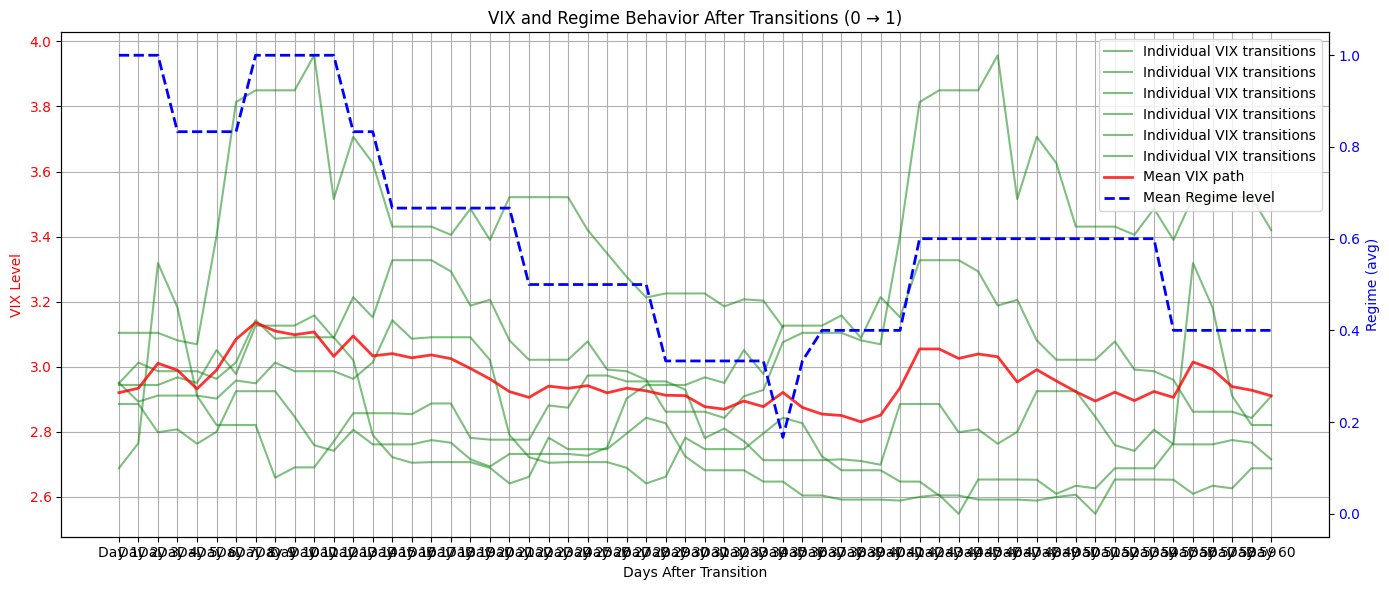

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Primary axis: VIX transitions
ax1 = plt.gca()
ax1.plot(vix_windows_df_test.T, color="green", alpha=0.5, label="Individual VIX transitions")
ax1.plot(vix_windows_df_test.mean(axis=0).values, color="red",alpha=0.8, linewidth=2, label="Mean VIX path")
ax1.set_xlabel("Days After Transition")
ax1.set_ylabel("VIX Level", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_title("VIX and Regime Behavior After Transitions (0 → 1)")
ax1.grid(True)

# Secondary axis: Regime values
ax2 = ax1.twinx()
ax2.plot(regime_windows_df_test.mean(axis=0).values, color="blue", linewidth=2, linestyle="--", label="Mean Regime level")
ax2.set_ylabel("Regime (avg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(-0.05, 1.05)  # Because regime is binary

# Combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()


In [289]:
vix_windows_df_test

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 51,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.547099,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167
2024-10-23,2.948641,3.012098,2.985682,2.985682,2.985682,2.962175,3.013081,3.142427,3.085573,3.090133,...,2.625393,2.687167,2.687167,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188
2024-12-15,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,...,2.845491,2.758109,2.740840,2.805782,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695
2025-01-25,2.884801,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,...,3.020913,3.077312,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539
2025-02-21,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,2.977059,3.125883,3.125883,3.125883,...,3.430432,3.430432,3.405189,3.485539,3.389462,3.521052,3.521052,3.521052,3.521052,3.420019
2025-03-28,3.103689,3.103689,3.103689,3.080533,3.068518,3.401864,3.813528,3.849722,3.849722,3.849722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
df_delayed_spike_prob_test, test_clf, test_vix_pct_change_lookback_df = macro_utils.clf_delayed_spike_prob(vix_windows_df_test, test_df, "vix_target")

In [291]:
df_delayed_spike_prob_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167,NaN
2024-10-23,2.948641,3.012098,2.985682,2.985682,2.985682,2.962175,3.013081,3.142427,3.085573,3.090133,...,2.687167,2.687167,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188,NaN
2024-12-15,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,...,2.758109,2.740840,2.805782,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,0.7825
2025-01-25,2.884801,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,...,3.077312,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539,NaN
2025-02-21,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,2.977059,3.125883,3.125883,3.125883,...,3.430432,3.405189,3.485539,3.389462,3.521052,3.521052,3.521052,3.521052,3.420019,0.2975


In [292]:
test_vix_pct_change_lookback_df.head()

,Day -30,Day -29,Day -28,Day -27,Day -26,Day -25,Day -24,Day -23,Day -22,Day -21,...,Day -10,Day -9,Day -8,Day -7,Day -6,Day -5,Day -4,Day -3,Day -2,Day -1
2024-12-15,0.045225,-0.012696,0.000000,0.000000,0.017567,0.017305,-0.005996,-0.035963,-0.015750,0.000000,...,0.002566,-0.022470,0.041396,0.000000,0.000000,-0.000266,-0.016304,0.009480,-0.003013,0.023529
2025-02-21,0.000978,-0.001957,-0.004201,0.069237,0.000000,0.000000,-0.030127,0.003252,-0.015836,0.013238,...,0.004780,-0.002937,-0.018439,-0.008140,0.014305,0.000000,0.000000,0.000000,-0.001913,0.009252
2025-03-28,-0.005774,0.034243,-0.024137,0.049990,0.000000,0.000000,0.010091,-0.022034,0.040742,-0.019358,...,0.018670,-0.028139,-0.001684,-0.008914,-0.033122,0.000000,0.000000,-0.006662,0.023413,0.006687


In [293]:
df_delayed_spike_prob_test.loc[test_vix_pct_change_lookback_df.index, "early_spike_prob"] = clf_delayed_spike_prob.predict_proba(test_vix_pct_change_lookback_df)[:, 1]


In [294]:
df_delayed_spike_prob_test.fillna(0.5, inplace=True)

In [295]:
df_delayed_spike_prob_test

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167,0.5000
2024-10-23,2.948641,3.012098,2.985682,2.985682,2.985682,2.962175,3.013081,3.142427,3.085573,3.090133,...,2.687167,2.687167,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188,0.5000
2024-12-15,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,...,2.758109,2.740840,2.805782,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,0.7700
2025-01-25,2.884801,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,...,3.077312,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539,0.5000
2025-02-21,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,2.977059,3.125883,3.125883,3.125883,...,3.430432,3.405189,3.485539,3.389462,3.521052,3.521052,3.521052,3.521052,3.420019,0.7600
2025-03-28,3.103689,3.103689,3.103689,3.080533,3.068518,3.401864,3.813528,3.849722,3.849722,3.849722,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.7275


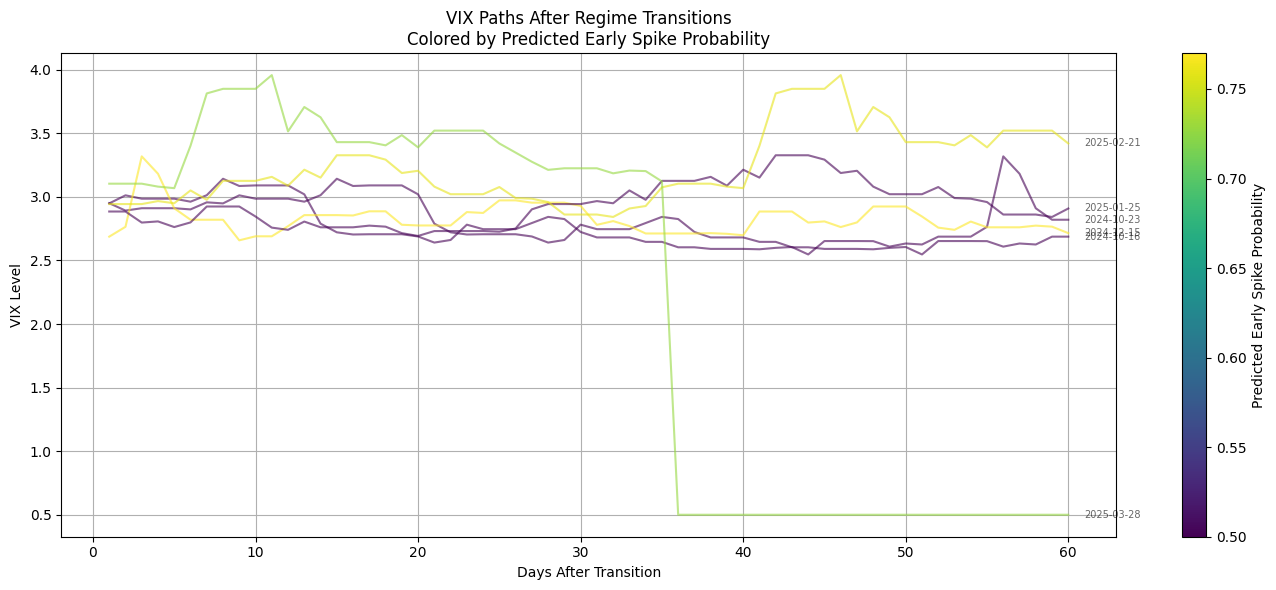

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Filter rows with predictions
df_plot = df_delayed_spike_prob_test.dropna(subset=["early_spike_prob"])

# Normalize probs for coloring
probs = df_plot["early_spike_prob"]
colors = cm.viridis((probs - probs.min()) / (probs.max() - probs.min()))

fig, ax = plt.subplots(figsize=(14, 6))

# Plot VIX paths, colored by classifier probability
for i, (date, row) in enumerate(df_plot.iterrows()):
    vix_path = row.iloc[:60]  # assumes 60-day VIX columns are first
    ax.plot(range(1, 61), vix_path.values, color=colors[i], alpha=0.6)
    ax.text(61, vix_path.values[-1], date.strftime("%Y-%m-%d"), fontsize=7, alpha=0.6, va="center")

# Add colorbar
sm = ScalarMappable(cmap="viridis", norm=Normalize(vmin=probs.min(), vmax=probs.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Early Spike Probability")

# Labels and layout
ax.set_title("VIX Paths After Regime Transitions\nColored by Predicted Early Spike Probability")
ax.set_xlabel("Days After Transition")
ax.set_ylabel("VIX Level")
ax.grid(True)
plt.tight_layout()
plt.show()



In [297]:
df_delayed_spike_prob_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167,0.50
2024-10-23,2.948641,3.012098,2.985682,2.985682,2.985682,2.962175,3.013081,3.142427,3.085573,3.090133,...,2.687167,2.687167,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188,0.50
2024-12-15,2.687167,2.764431,3.318540,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,...,2.758109,2.740840,2.805782,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,0.77
2025-01-25,2.884801,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,...,3.077312,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539,0.50
2025-02-21,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,2.977059,3.125883,3.125883,3.125883,...,3.430432,3.405189,3.485539,3.389462,3.521052,3.521052,3.521052,3.521052,3.420019,0.76


In [298]:
regime_windows_df_test = regime_windows_df_test.replace(2, 1)


In [299]:
regime_windows_df_test

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 51,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-12-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2025-03-28,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news_test = test_df.copy()                       # original df you posted   # string/ts column → index
news_test = news_test.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats_test = engineer_news_feats(news_test)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats_test.index = pd.to_datetime(news_feats_test.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats_test.index.min(),
                          news_feats_test.index.max(),
                          freq='D')

news_dense_test = (
    news_feats_test
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)



In [ ]:
# ------------------------------------------------------------
# 3)  BUILD ARC-LEVEL TABLE  (robust to missing news dates + look-back stats)
# ------------------------------------------------------------
records = []
lookback_days = [2, 5, 7]
lookback_feats = [
    "shock_neg",
    "vix_zscore",
    "vix_target",
    "sentiment_dominance",
]

for dt, row in vix_windows_df_test.iterrows():
    # --- detect arc in the 60-day window ---
    v = row[[f"Day {i}" for i in range(1, 61)]].values
    r = regime_windows_df_test.loc[dt, [f"Day {i}" for i in range(1, 61)]].values
    start_idx, peak_idx = macro_utils.detect_spike_arc_within_regime(v, r)
    start_val, peak_val = v[start_idx], v[peak_idx]
    rise_dur = peak_idx - start_idx
    decay_idx = np.argmax(v[peak_idx:] < 0.5 * peak_val)
    half_life = decay_idx if decay_idx > 0 else len(v) - peak_idx

    dt_norm = pd.to_datetime(dt).normalize()

    # -------- safe fetch of nearest-past news features --------
    try:
        feats_on_start = news_dense_test.loc[:dt_norm].iloc[-1].to_dict()
    except IndexError:
        # no prior news available – skip this arc
        continue

    # -------- compute look-back statistics from classification_df --------
    lookback_stats = {}
    for w in lookback_days:
        start_date = dt_norm - pd.Timedelta(days=w)
        window_df = classification_df_test.loc[start_date:dt_norm]

        for feat in lookback_feats:
            col_mean = window_df[feat].mean()
            col_std = window_df[feat].std()
            # percent change over the window: (last−first) / first
            if len(window_df) > 1 and window_df[feat].iloc[0] != 0:
                col_pct = (window_df[feat].iloc[-1] - window_df[feat].iloc[0]) / window_df[feat].iloc[0]
            else:
                col_pct = np.nan

            lookback_stats[f"{feat}_mean_{w}d"] = col_mean
            lookback_stats[f"{feat}_std_{w}d"]  = col_std
            lookback_stats[f"{feat}_pctchg_{w}d"] = col_pct

    # --- aggregate everything into one record ---
    records.append({
        "date_start":    dt_norm,
        "peak_vix":      peak_val,
        "vix0":          start_val,
        "T_up":          rise_dur,
        "T_half":        half_life,
        **feats_on_start,
        **lookback_stats,
    })

arc_df_test = (
    pd.DataFrame(records)
      .set_index("date_start")
      .astype(float, errors="ignore")
)

print("arc_df shape:", arc_df.shape)


arc_df shape: (17, 70)


/Users/dsuniaga/Documents/GitHub/VIXNLP/finnhub_news/macro_utils.py:371: RuntimeWarning: invalid value encountered in cast
  r = np.asarray(regime_path, dtype=np.int8)


In [302]:
arc_df_test.tail()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,shock_neg_pctchg_7d,vix_zscore_mean_7d,vix_zscore_std_7d,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d
date_start,,,,,,,,,,,,,,,,,,,,,
2024-10-23,3.142427,2.948641,7.0,53.0,-0.157935,-0.975736,40.0,-0.038889,-0.971612,60.0,...,0.000107,-0.059311,0.263105,-0.787686,2.925916,0.030137,-0.005889,2.875,10.260013,-3.000000
2024-12-15,3.318540,2.687167,2.0,58.0,-0.003263,-0.973524,20.0,-0.137889,-0.973524,48.0,...,0.005419,-0.280197,0.359363,-1.805063,2.649820,0.027714,0.013055,60.625,31.185791,0.071429
2025-01-25,2.924236,2.884801,6.0,54.0,0.117867,-0.971038,7.0,0.201732,-0.680292,15.0,...,-0.122846,-0.979089,0.654743,-1.455344,2.731881,0.062000,0.063700,8.500,15.212777,-0.454545
2025-02-21,3.327192,2.943386,14.0,46.0,-0.115498,-0.975739,49.0,-0.161775,-0.971196,74.0,...,0.002167,-0.451964,0.837399,-2.284270,2.749504,0.063693,0.077759,29.750,17.458113,-0.519231
2025-03-28,3.957570,3.103689,10.0,25.0,-0.162400,-0.970411,129.0,-0.077482,-0.974197,228.0,...,-0.001571,-1.087851,0.491524,-0.937639,2.911971,0.077219,0.039180,77.625,38.059868,-0.241758


In [303]:
arc_df_test.tail()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,shock_neg_pctchg_7d,vix_zscore_mean_7d,vix_zscore_std_7d,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d
date_start,,,,,,,,,,,,,,,,,,,,,
2024-10-23,3.142427,2.948641,7.0,53.0,-0.157935,-0.975736,40.0,-0.038889,-0.971612,60.0,...,0.000107,-0.059311,0.263105,-0.787686,2.925916,0.030137,-0.005889,2.875,10.260013,-3.000000
2024-12-15,3.318540,2.687167,2.0,58.0,-0.003263,-0.973524,20.0,-0.137889,-0.973524,48.0,...,0.005419,-0.280197,0.359363,-1.805063,2.649820,0.027714,0.013055,60.625,31.185791,0.071429
2025-01-25,2.924236,2.884801,6.0,54.0,0.117867,-0.971038,7.0,0.201732,-0.680292,15.0,...,-0.122846,-0.979089,0.654743,-1.455344,2.731881,0.062000,0.063700,8.500,15.212777,-0.454545
2025-02-21,3.327192,2.943386,14.0,46.0,-0.115498,-0.975739,49.0,-0.161775,-0.971196,74.0,...,0.002167,-0.451964,0.837399,-2.284270,2.749504,0.063693,0.077759,29.750,17.458113,-0.519231
2025-03-28,3.957570,3.103689,10.0,25.0,-0.162400,-0.970411,129.0,-0.077482,-0.974197,228.0,...,-0.001571,-1.087851,0.491524,-0.937639,2.911971,0.077219,0.039180,77.625,38.059868,-0.241758


In [304]:
arc_df_test['early_spike_prob'] = vix_windows_df_test['early_spike_prob'].fillna(0.5)

In [305]:
# Get column sets
cols_arc_df = set(arc_df.columns)
cols_arc_df_test = set(arc_df_test.columns)

# Columns in arc_df but NOT in arc_df_test
diff_arc_not_test = cols_arc_df - cols_arc_df_test

# Columns in arc_df_test but NOT in arc_df
diff_test_not_arc = cols_arc_df_test - cols_arc_df

# All differing columns
diff_all = cols_arc_df.symmetric_difference(cols_arc_df_test)

# Print results
print("Columns in arc_df but not in arc_df_test:", diff_arc_not_test)
print("Columns in arc_df_test but not in arc_df:", diff_test_not_arc)
print("All differing columns:", diff_all)


Columns in arc_df but not in arc_df_test: {'delta_peak', 'spike5d'}
Columns in arc_df_test but not in arc_df: {'regime_t_raw', 'regime_t', 'panic_prob_t+1', 'vix_target_t+1', 'regime_group', 'regime_t-1', 'is_sustained_regime1', 'is_transition', 'vix_target'}
All differing columns: {'panic_prob_t+1', 'is_sustained_regime1', 'regime_t', 'vix_target_t+1', 'regime_group', 'spike5d', 'regime_t-1', 'is_transition', 'delta_peak', 'regime_t_raw', 'vix_target'}


In [306]:
arc_df_test.drop(columns=diff_test_not_arc, inplace=True)

In [307]:
#arc_df_test['peak_vix'].iloc[-1] = np.log(55)

In [308]:
arc_df_test.iloc[-1]

peak_vix                          3.957570
vix0                              3.103689
T_up                             10.000000
T_half                           25.000000
summary_mean                     -0.162400
                                   ...    
vix_target_pctchg_7d              0.039180
sentiment_dominance_mean_7d      77.625000
sentiment_dominance_std_7d       38.059868
sentiment_dominance_pctchg_7d    -0.241758
early_spike_prob                  0.727500
Name: 2025-03-28 00:00:00, Length: 68, dtype: float64

In [309]:
feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half", 'spike5d', 'delta_peak'])


In [310]:
arc_df_test['early_spike_prob'] = arc_df_test['early_spike_prob'].fillna(0.5)

In [311]:
print(list(feature_cols))
print(list(arc_df_test.reindex(columns=feature_cols).columns))


['dom_0', 'dom_1', 'dominance_trigger', 'early_spike_prob', 'ewm_mean', 'ewm_mean_flat', 'ewm_std', 'ewm_std_flat', 'headline_mean', 'headline_min', 'headline_neg_count', 'headline_pos_count', 'mean_prev', 'mean_sentiment_decay', 'overall_mean', 'overall_min', 'overall_neg_count', 'overall_pos_count', 'sentiment_dominance', 'sentiment_dominance_mean_2d', 'sentiment_dominance_mean_5d', 'sentiment_dominance_mean_7d', 'sentiment_dominance_pctchg_2d', 'sentiment_dominance_pctchg_5d', 'sentiment_dominance_pctchg_7d', 'sentiment_dominance_std_2d', 'sentiment_dominance_std_5d', 'sentiment_dominance_std_7d', 'shock_neg', 'shock_neg_mean_2d', 'shock_neg_mean_5d', 'shock_neg_mean_7d', 'shock_neg_pctchg_2d', 'shock_neg_pctchg_5d', 'shock_neg_pctchg_7d', 'shock_neg_std_2d', 'shock_neg_std_5d', 'shock_neg_std_7d', 'summary_mean', 'summary_min', 'summary_neg_count', 'vix0', 'vix_7d_pct', 'vix_ewm_zscore', 'vix_ewm_zscore_flat', 'vix_flat_abs', 'vix_target_mean_2d', 'vix_target_mean_5d', 'vix_target_

In [312]:
arc_df_test.iloc[-1]

peak_vix                          3.957570
vix0                              3.103689
T_up                             10.000000
T_half                           25.000000
summary_mean                     -0.162400
                                   ...    
vix_target_pctchg_7d              0.039180
sentiment_dominance_mean_7d      77.625000
sentiment_dominance_std_7d       38.059868
sentiment_dominance_pctchg_7d    -0.241758
early_spike_prob                  0.727500
Name: 2025-03-28 00:00:00, Length: 68, dtype: float64

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


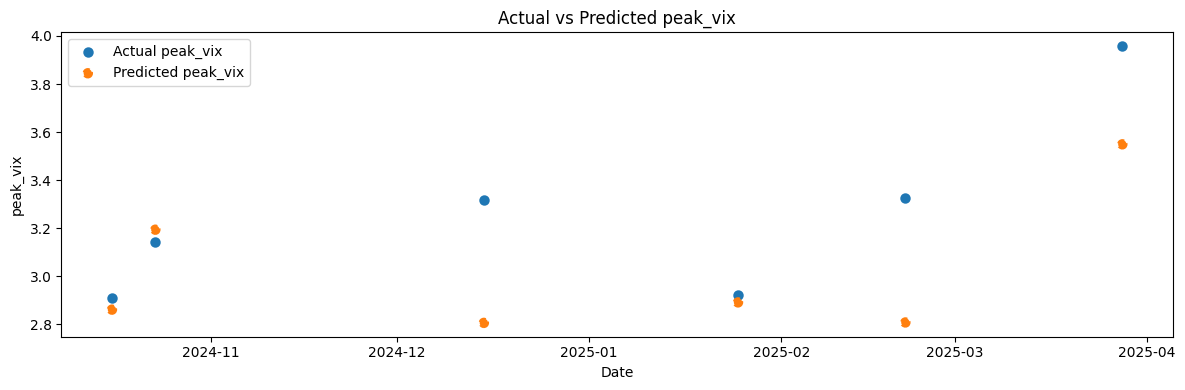

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


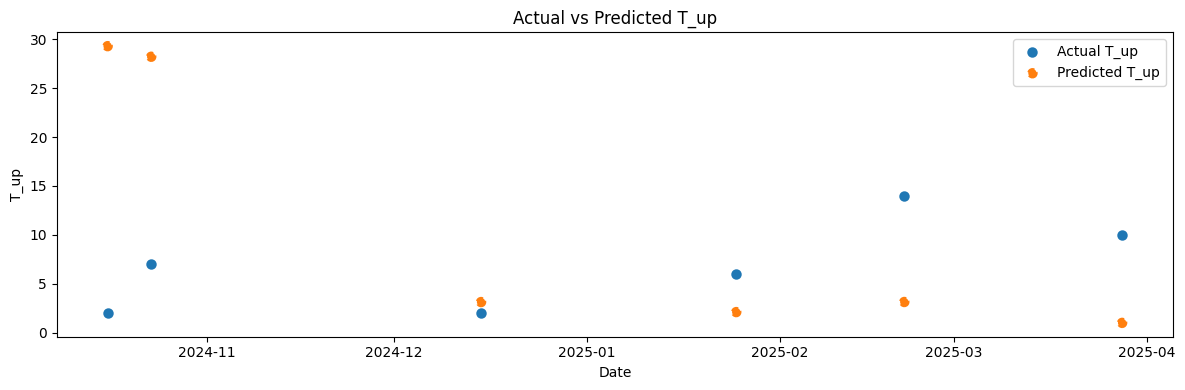

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


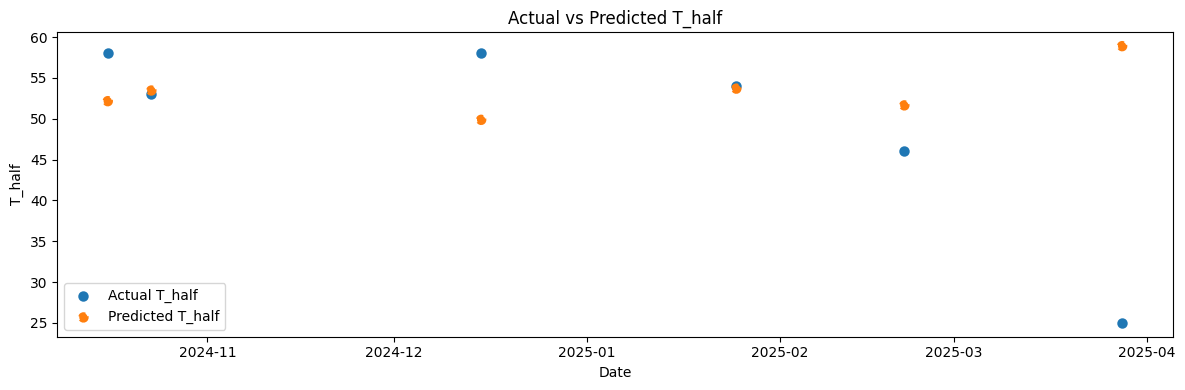

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


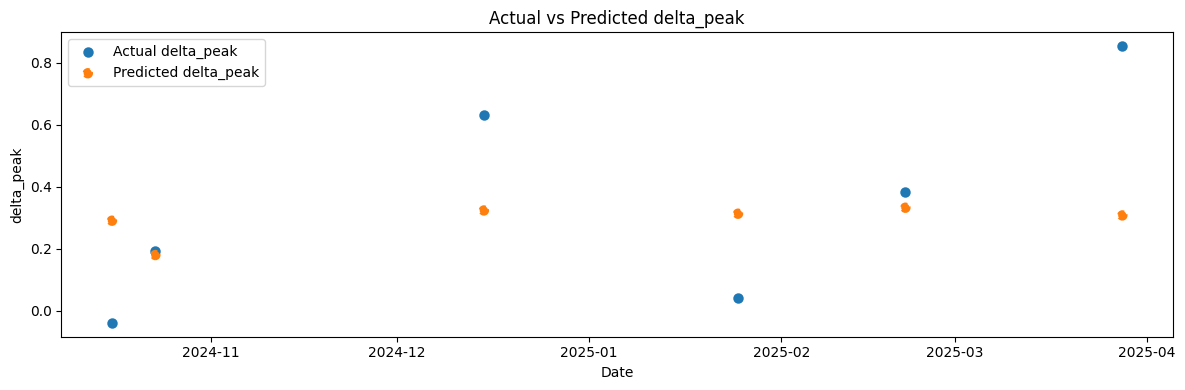

In [ ]:
import joblib, matplotlib.pyplot as plt
arc_df_test['delta_peak'] = arc_df_test['peak_vix'] - arc_df_test['vix0']
arc_df_test["spike5d"] = (arc_df_test["delta_peak"] > 0.1 * arc_df_test["vix0"]).astype(int)

feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half", "delta_peak", "spike5d"])

X_full_test = arc_df_test.reindex(columns=feature_cols)
X_full_test = X_full_test.fillna(0)

dates = arc_df_test.index         # x‑axis

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
    "delta_peak": joblib.load("mlp_delta_peak.pkl"),
}

for target, model in models.items():
    y_true_test = arc_df_test[target].values
    y_pred_test = model.predict(X_full_test)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


# XGBoost graph

In [5127]:
print(per_markov_test)

0.04


# RECENT/TRADE

In [5222]:
df['sentiment_dominance']

date
2017-12-13       2
2017-12-14    1255
2017-12-26       1
2017-12-27       2
2018-01-02       1
              ... 
2025-05-22     444
2025-05-23     302
2025-05-24     323
2025-05-25     243
2025-05-26     477
Name: sentiment_dominance, Length: 1941, dtype: int64

In [5223]:
test_df_trade = test_df.copy()

In [5224]:
def get_past_60_trading_days(df, target_date):
    """
    Given a DataFrame with a DatetimeIndex and a target date (string or datetime),
    return the 60 trading days *before* that date (exclusive).
    """
    # Ensure datetime format
    target_date = pd.to_datetime(target_date)
    
    # Filter to dates strictly before the target date
    df_before = df[df.index < target_date]
    
    # Get last 60 rows before the target date
    return df_before.tail(61)


In [5235]:
df_trade = get_past_60_trading_days(test_df_trade, "2025-05-27")

In [5236]:
df_trade['sentiment_dominance']

date
2025-03-24    132
2025-03-25     59
2025-03-26    118
2025-03-27     93
2025-03-28     69
             ... 
2025-05-22    444
2025-05-23    302
2025-05-24    323
2025-05-25    243
2025-05-26    477
Name: sentiment_dominance, Length: 61, dtype: int64

In [5237]:
# 1. After fitting on training set
train_params = results.params

# 2. Prepare your test data

X_test = df_trade[selected_features]
y_test = df_trade['vix_ewm_zscore']


In [5238]:
X_test.tail()

,shock_neg,dominance_trigger
date,,
2025-05-22,-0.975698,0
2025-05-23,-0.975913,0
2025-05-24,-0.974329,0
2025-05-25,-0.974720,0
2025-05-26,-0.973704,0


In [5239]:
# 3. Define same model on test data
model_trade = MarkovRegression(
    endog=y_test,
    exog=X_test,
    k_regimes=2
    ,
    switching_variance=False
)

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [5240]:
results_test = model_trade.filter(train_params)

# 5. Extract real-time regime (filtered) — sensitive threshold
df_trade['regime_t_raw'] = results_test.filtered_marginal_probabilities[1]
df_trade['regime_t'] = df_trade['regime_t_raw'].apply(lambda r: 1 if r > per_markov_test else 0)

# 6. Predict probability of panic regime tomorrow using classifier (NO regime_t)
df_trade['panic_prob_t+1'] = clf.predict_proba(X_test)[:, 1]

In [5241]:
df_trade['vix_target'].T

date
2025-03-24    2.861057
2025-03-25    2.841998
2025-03-26    2.908539
2025-03-27    2.927989
2025-03-28    3.075005
                ...   
2025-05-22    3.009635
2025-05-23    3.104138
2025-05-24    3.023834
2025-05-25    3.023834
2025-05-26    3.023834
Name: vix_target, Length: 61, dtype: float64

In [5257]:
df_trade['regime_t_raw'].loc['2025-05-26']

np.float64(0.016107211313773816)

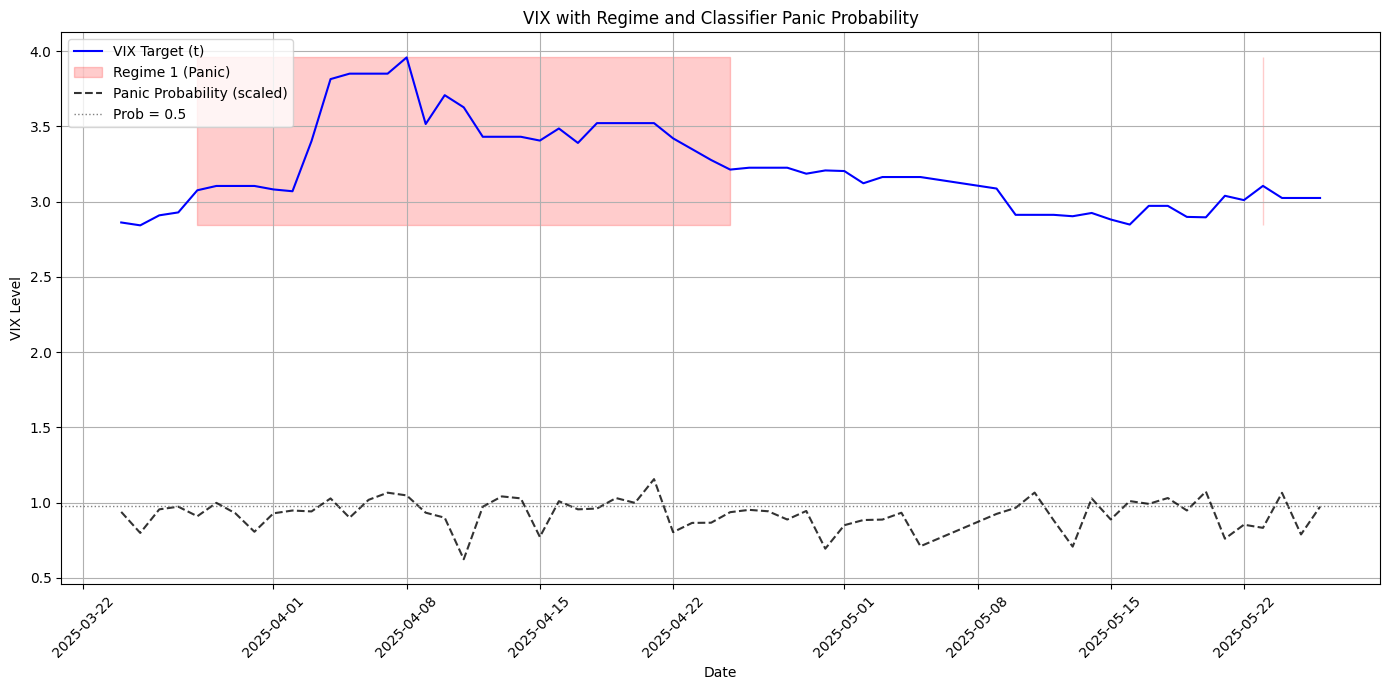

In [5243]:
import matplotlib.pyplot as plt

# Assumes test_df already has:
# - 'vix_target_t+1' (VIX values)
# - 'regime_t' (real-time inferred regime: 0 or 1)
# - 'panic_prob_t+1' (classifier probability of panic tomorrow)

plt.figure(figsize=(14, 7))

# 1. Plot VIX
plt.plot(df_trade.index, df_trade["vix_target"], label="VIX Target (t)", color="blue")

# 2. Shade areas where regime is 1 (panic)
plt.fill_between(
    df_trade.index,
    df_trade["vix_target"].min(),
    df_trade["vix_target"].max(),
    where=df_trade["regime_t"] == 1,
    color="red",
    alpha=0.2,
    label="Regime 1 (Panic)"
)

# 3. Plot panic probability (scaled for visibility)
scaled_prob = df_trade["panic_prob_t+1"] * (df_trade["vix_target"].max() - 2)
plt.plot(df_trade.index, scaled_prob, label="Panic Probability (scaled)", color="black", linestyle="--", alpha=0.8)

# Optional: Add threshold line for prob=0.5 scaled to same scale
plt.axhline(y=0.5 * (df_trade["vix_target"].max() - 2), color="gray", linestyle=":", linewidth=1, label="Prob = 0.5")

# Finalize
plt.title("VIX with Regime and Classifier Panic Probability")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5244]:
classification_df_trade = macro_utils.identify_sustained_regimes_and_transitions(df_trade, trade = True)

In [5150]:
classification_df_trade.shape

(61, 33)

In [5151]:
result_trade = macro_utils.transform_vix_data(classification_df_trade, window=50, trade = True, k=2)
vix_windows_past_df_trade = result_trade["vix_windows_past_df_train"]

In [5152]:
vix_windows_past_df_trade

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 41,Day 42,Day 43,Day 44,Day 45,Day 46,Day 47,Day 48,Day 49,Day 50
transition_time,,,,,,,,,,,,,,,,,,,,,
2025-05-23,3.103689,3.080533,3.068518,3.401864,3.813528,3.849722,3.849722,3.849722,3.95757,3.515121,...,2.90252,2.924236,2.880882,2.847232,2.97144,2.97144,2.898119,2.895359,3.038313,3.009635


In [5154]:
from macro_utils import calculate_pct_changes

# Get current date (your live transition point — usually last row in trade DF)
live_index = classification_df_trade[classification_df_trade["is_transition"]].index[-1:]
print(f"✅ Using live index: {live_index}")

# Calculate past % changes from historical VIX column
vix_pct_change_lookback_df_trade, used_indices = calculate_pct_changes(
    df_model=classification_df_trade,
    valid_indices=live_index,
    lookback=30,
    vix_column="vix_target"
)

# Now predict with  classifier
early_spike_prob_trade = clf_delayed_spike_prob.predict_proba(vix_pct_change_lookback_df_trade)[0][1]
print(f"🟢 Early spike probability: {early_spike_prob_trade:.2%}")


✅ Using live index: DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='date', freq=None)
🟢 Early spike probability: 74.75%


In [5155]:
vix_pct_change_lookback_df_trade.head()

,Day -30,Day -29,Day -28,Day -27,Day -26,Day -25,Day -24,Day -23,Day -22,Day -21,...,Day -10,Day -9,Day -8,Day -7,Day -6,Day -5,Day -4,Day -3,Day -2,Day -1
2025-05-23,0.0,0.0,-0.028694,-0.021015,-0.021545,-0.019401,0.003861,0.0,0.0,-0.012325,...,-0.003189,0.007482,-0.014826,-0.011681,0.043624,0.0,-0.024675,-0.000952,0.049373,-0.009439


In [5156]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news_test = df_trade.copy()                       # original df you posted   # string/ts column → index
news_test = news_test.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats_trade = engineer_news_feats(news_test)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats_trade.index = pd.to_datetime(news_feats_trade.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats_trade.index.min(),
                          news_feats_trade.index.max(),
                          freq='D')

news_dense_trade = (
    news_feats_test
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)

/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_20542/2497212495.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .ffill()                 # carry last known sentiment forward


In [5157]:
news_dense_trade.columns

Index(['summary_mean', 'summary_min', 'summary_neg_count', 'headline_mean',
       'headline_min', 'headline_pos_count', 'headline_neg_count',
       'overall_mean', 'overall_min', 'overall_pos_count', 'overall_neg_count',
       'vix_target', 'mean_sentiment_decay', 'shock_neg',
       'sentiment_dominance', 'dominance_trigger', 'vix_7d_pct', 'vix_zscore',
       'ewm_mean', 'ewm_std', 'vix_ewm_zscore', 'mean_prev', 'vix_flat_abs',
       'ewm_mean_flat', 'ewm_std_flat', 'vix_ewm_zscore_flat', 'regime_t_raw',
       'regime_t', 'panic_prob_t+1', 'vix_target_t+1', 'regime_group',
       'is_sustained_regime1', 'regime_t-1', 'is_transition', 'dom_0',
       'dom_1'],
      dtype='object')

In [5158]:
feature_cols = feature_cols.drop(['date','date.1'], errors='ignore')


In [5159]:
df_trade.columns

Index(['summary_mean', 'summary_min', 'summary_neg_count', 'headline_mean',
       'headline_min', 'headline_pos_count', 'headline_neg_count',
       'overall_mean', 'overall_min', 'overall_pos_count', 'overall_neg_count',
       'vix_target', 'mean_sentiment_decay', 'shock_neg',
       'sentiment_dominance', 'dominance_trigger', 'vix_7d_pct', 'vix_zscore',
       'ewm_mean', 'ewm_std', 'vix_ewm_zscore', 'mean_prev', 'vix_flat_abs',
       'ewm_mean_flat', 'ewm_std_flat', 'vix_ewm_zscore_flat', 'regime_t_raw',
       'regime_t', 'panic_prob_t+1', 'regime_group', 'is_sustained_regime1',
       'regime_t-1', 'is_transition'],
      dtype='object')

In [5160]:
def build_live_arc_row(start_idx,
                       news_dense,
                       classification_df_trade,
                       feature_cols,
                       lookback_days=(2, 5, 7),
                       lookback_feats=("shock_neg", "vix_zscore", "vix_target", "sentiment_dominance")):
    """
    Build one live-arc row of features at timestamp `start_idx`.
    Returns a DataFrame with one row and columns exactly = feature_cols.
    """
    # normalize the timestamp
    dt_norm = pd.to_datetime(start_idx).normalize()

    # --- 1) grab the base row from classification_df_trade ---
    try:
        row = classification_df_trade.loc[[start_idx]].copy()
    except KeyError:
        print(f"❌ No classification data at {start_idx}")
        return None

    # --- 2) pull the latest news features (dropping any 'date' col) ---
    try:
        feats_on_start = (
            news_dense
            .loc[:dt_norm]
            .iloc[-1]
            .drop(labels=["date"], errors="ignore")
            .to_dict()
        )
    except IndexError:
        print(f"❌ No prior news available at {dt_norm}")
        return None

    # --- 3) one-hot encode the 'dominance_trigger' field ---
    dom_dummies = pd.get_dummies(row["dominance_trigger"], prefix="dom")
    # ensure both dom_0 and dom_1 exist
    for col in ("dom_0", "dom_1"):
        dom_dummies[col] = dom_dummies.get(col, 0)
    row = pd.concat([row, dom_dummies], axis=1)

    # --- 4) merge in the news features ---
    row = row.assign(**feats_on_start)

    # --- 5) drop any raw date columns to avoid leakage ---
    row = row.drop(columns=[c for c in row.columns if c.startswith("date")], errors="ignore")

    # --- 6) compute look-back stats for each window & feature ---
    lookback_stats = {}
    for w in lookback_days:
        start_date = dt_norm - pd.Timedelta(days=w)
        window_df = classification_df_trade.loc[start_date:dt_norm]

        for feat in lookback_feats:
            series = window_df.get(feat, pd.Series(dtype=float))
            m = series.mean()
            s = series.std()
            if len(series) > 1 and series.iloc[0] != 0:
                pct = (series.iloc[-1] - series.iloc[0]) / series.iloc[0]
            else:
                pct = np.nan

            lookback_stats[f"{feat}_mean_{w}d"]   = m
            lookback_stats[f"{feat}_std_{w}d"]    = s
            lookback_stats[f"{feat}_pctchg_{w}d"] = pct

    # merge lookback stats into row
    row = row.assign(**lookback_stats)

    # --- 7) finally, extract exactly the requested feature_cols (filling missing with 0) ---
    feature_values = {
        col: row[col].iloc[0] if col in row.columns else 0.0
        for col in feature_cols
    }
    arc_row = pd.DataFrame([feature_values], index=[start_idx])[feature_cols]
    return arc_row


In [5161]:
arc_df.columns

Index(['peak_vix', 'vix0', 'T_up', 'T_half', 'summary_mean', 'summary_min',
       'summary_neg_count', 'headline_mean', 'headline_min',
       'headline_pos_count', 'headline_neg_count', 'overall_mean',
       'overall_min', 'overall_pos_count', 'overall_neg_count',
       'mean_sentiment_decay', 'shock_neg', 'sentiment_dominance',
       'dominance_trigger', 'vix_7d_pct', 'vix_zscore', 'ewm_mean', 'ewm_std',
       'vix_ewm_zscore', 'mean_prev', 'vix_flat_abs', 'ewm_mean_flat',
       'ewm_std_flat', 'vix_ewm_zscore_flat', 'dom_0', 'dom_1',
       'shock_neg_mean_2d', 'shock_neg_std_2d', 'shock_neg_pctchg_2d',
       'vix_zscore_mean_2d', 'vix_zscore_std_2d', 'vix_zscore_pctchg_2d',
       'vix_target_mean_2d', 'vix_target_std_2d', 'vix_target_pctchg_2d',
       'sentiment_dominance_mean_2d', 'sentiment_dominance_std_2d',
       'sentiment_dominance_pctchg_2d', 'shock_neg_mean_5d',
       'shock_neg_std_5d', 'shock_neg_pctchg_5d', 'vix_zscore_mean_5d',
       'vix_zscore_std_5d', 'vi

In [5162]:
classification_df_trade['sentiment_dominance']

date
2025-03-21     91
2025-03-22     23
2025-03-23     36
2025-03-24    132
2025-03-25     59
             ... 
2025-05-19    179
2025-05-20    328
2025-05-21    494
2025-05-22    444
2025-05-23    302
Name: sentiment_dominance, Length: 61, dtype: int64

In [5163]:
start_idx = classification_df_trade[classification_df_trade["is_transition"]].index[-1]

# Build feature row
arc_row_live = build_live_arc_row(start_idx, news_dense_trade, classification_df_trade, feature_cols)


In [5164]:
arc_row_live['early_spike_prob'] = early_spike_prob_trade

In [5165]:
print(early_spike_prob_trade)

0.7475


In [5166]:
if early_spike_prob_trade > 0.75:
    min_vix=df_trade['vix_target'].iloc[-20:].min()
    arc_row_live['vix0'] = min_vix
    print('<')
    print(min_vix)
else:
    min_vix=df_trade['vix_target'].iloc[-1:].min()
    arc_row_live['vix0'] = min_vix
    print(min_vix)


3.1041381473977774


In [5167]:
print(arc_row_live['vix0'])

2025-05-23    3.104138
Name: vix0, dtype: float64


In [5168]:
arc_df['sentiment_dominance_mean_2d']

date_start
2020-10-11     38.333333
2020-10-20     87.666667
2021-01-04     42.000000
2021-05-12     -7.666667
2021-07-21      4.000000
2021-09-12    132.666667
2021-11-25     63.666667
2022-01-21      4.666667
2022-04-26     -1.000000
2022-06-21     86.000000
2022-09-06     19.333333
2023-02-25     22.666667
2023-08-06     -1.666667
2023-09-30     56.333333
2024-01-16      1.333333
2024-04-06      1.000000
2024-07-19      8.333333
Name: sentiment_dominance_mean_2d, dtype: float64

In [5169]:
import joblib
import pandas as pd

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
    "delta_peak": joblib.load("mlp_delta_peak.pkl"),
}


In [5170]:
print(list(feature_cols))
print(list(arc_df_test.columns))
print(list(arc_row_live.columns))

['dom_0', 'dom_1', 'dominance_trigger', 'early_spike_prob', 'ewm_mean', 'ewm_mean_flat', 'ewm_std', 'ewm_std_flat', 'headline_mean', 'headline_min', 'headline_neg_count', 'headline_pos_count', 'mean_prev', 'mean_sentiment_decay', 'nn_T_half', 'nn_T_up', 'nn_delta_peak', 'nn_peak_vix', 'overall_mean', 'overall_min', 'overall_neg_count', 'overall_pos_count', 'sentiment_dominance', 'sentiment_dominance_mean_2d', 'sentiment_dominance_mean_5d', 'sentiment_dominance_mean_7d', 'sentiment_dominance_pctchg_2d', 'sentiment_dominance_pctchg_5d', 'sentiment_dominance_pctchg_7d', 'sentiment_dominance_std_2d', 'sentiment_dominance_std_5d', 'sentiment_dominance_std_7d', 'shock_neg', 'shock_neg_mean_2d', 'shock_neg_mean_5d', 'shock_neg_mean_7d', 'shock_neg_pctchg_2d', 'shock_neg_pctchg_5d', 'shock_neg_pctchg_7d', 'shock_neg_std_2d', 'shock_neg_std_5d', 'shock_neg_std_7d', 'summary_mean', 'summary_min', 'summary_neg_count', 'vix0', 'vix_7d_pct', 'vix_ewm_zscore', 'vix_ewm_zscore_flat', 'vix_flat_abs', 

In [5171]:
feature_cols = arc_df_test.columns.difference(["peak_vix", "T_up", "T_half", 'delta_peak', 'spike5d'])

In [5172]:
arc_row_live = arc_row_live.reindex(columns=feature_cols)

In [5173]:
arc_row_live['vix0']

2025-05-23    3.104138
Name: vix0, dtype: float64

In [5174]:
arc_row_live['early_spike_prob'] = early_spike_prob_trade

In [5175]:
print(early_spike_prob_trade)

0.7475


In [5176]:
arc_row_live

,dom_0,dom_1,dominance_trigger,early_spike_prob,ewm_mean,ewm_mean_flat,ewm_std,ewm_std_flat,headline_mean,headline_min,...,vix_zscore,vix_zscore_mean_2d,vix_zscore_mean_5d,vix_zscore_mean_7d,vix_zscore_pctchg_2d,vix_zscore_pctchg_5d,vix_zscore_pctchg_7d,vix_zscore_std_2d,vix_zscore_std_5d,vix_zscore_std_7d
2025-05-23,True,False,0.0,0.7475,28.172957,30.072834,6.914125,6.460225,-0.039443,-0.973332,...,-1.251975,-0.311121,-0.712431,-0.872401,-1.08716,-1.039841,-1.022935,0.306066,0.487787,0.536018


In [5177]:
arc_row_live.isna().sum()[arc_row_live.isna().sum() > 0]


Series([], dtype: int64)

In [5178]:
arc_row_live['sentiment_dominance_pctchg_5d'] = arc_row_live['sentiment_dominance_pctchg_7d']

In [5179]:
print(arc_row_live['vix0'])


2025-05-23    3.104138
Name: vix0, dtype: float64


In [5180]:
X_full_test.iloc[1].equals(arc_row_live)


False

In [5181]:
import pandas as pd

# initialize DataFrame with nn_-prefixed columns
live_preds_df = pd.DataFrame(columns=[f"nn_{t}" for t in models.keys()])

# — later, when you do your live predict:
if arc_row_live is not None:
    # predict and store under nn_<target> keys
    live_preds = {
        f"nn_{target}": float(models[target].predict(arc_row_live[feature_cols].values))
        for target in models
    }

    # append the new prediction as a row, indexed by the current date
    live_preds_df.loc[start_idx] = live_preds

    print(f"\n📍 Live prediction at {start_idx.date()}:")
    for target, val in live_preds.items():
        print(f"  {target:<12} → {val:.2f}")

    # (optional) view your accumulated predictions
    print("\nAll live preds so far:")
    print(live_preds_df)

else:
    print("❌ Failed to build input row.")



📍 Live prediction at 2025-05-23:
  nn_peak_vix  → 3.66
  nn_T_up      → 1.13
  nn_T_half    → 54.53
  nn_delta_peak → 0.36

All live preds so far:
            nn_peak_vix   nn_T_up  nn_T_half  nn_delta_peak
2025-05-23     3.660908  1.132539  54.533241       0.363547


/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_20542/3192587301.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f"nn_{target}": float(models[target].predict(arc_row_live[feature_cols].values))
/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_20542/3192587301.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f"nn_{target}": float(models[target].predict(arc_row_live[feature_cols].values))
/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_20542/3192587301.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single eleme

In [5182]:
arc_df_with_nn_trade = arc_row_live.join(live_preds_df)


# XGB prediction

In [5183]:
print(top_features)
#y_full_trade = arc_df_with_nn_trade[target_cols].values

['vix_zscore_pctchg_5d', 'vix_target_mean_2d', 'vix0', 'vix_target_mean_5d', 'vix_target_mean_7d', 'sentiment_dominance_std_7d', 'headline_min', 'shock_neg_std_5d']


In [5184]:
import joblib

# 1) Prepare your live feature DataFrame & result container
feature_cols    = arc_df_with_nn_trade.columns.difference(["T_up", "T_half", "peak_vix", "spike5d", "delta_peak"])
X_full_trade    = arc_df_with_nn_trade[top_features].values     # will hold predictions

# 2) Define which quantiles you want
quantiles = [0.10, 0.50, 0.90]             # for example

# 3) Loop & predict
for q in quantiles:
    # load the saved quantile model
    model = joblib.load(f"xgb_delta_peak_q{q:.2f}.pkl")
    
    # generate predictions and store in your live DataFrame
    arc_df_with_nn_trade[f"xgb_delta_peak_q{q:.2f}"] = model.predict(X_full_trade)

# 4) (Optional) if you want a single point estimate, pick the median:
# live_preds_df["delta_peak_pred"] = live_preds_df["xgb_delta_peak_q0.50"]

# Now live_preds_df has your original features plus the 3 quantile columns
print(arc_df_with_nn_trade.filter(like="xgb_delta_peak").head())


            xgb_delta_peak_q0.10  xgb_delta_peak_q0.50  xgb_delta_peak_q0.90
2025-05-23              0.127217              0.170804              0.266737


In [5185]:
arc_df_with_nn_trade

,dom_0,dom_1,dominance_trigger,early_spike_prob,ewm_mean,ewm_mean_flat,ewm_std,ewm_std_flat,headline_mean,headline_min,...,vix_zscore_std_2d,vix_zscore_std_5d,vix_zscore_std_7d,nn_peak_vix,nn_T_up,nn_T_half,nn_delta_peak,xgb_delta_peak_q0.10,xgb_delta_peak_q0.50,xgb_delta_peak_q0.90
2025-05-23,True,False,0.0,0.7475,28.172957,30.072834,6.914125,6.460225,-0.039443,-0.973332,...,0.306066,0.487787,0.536018,3.660908,1.132539,54.533241,0.363547,0.127217,0.170804,0.266737


In [5186]:
excluded = {"peak_vix", "delta_peak", "T_up", "T_half", "spike5d"}

# 1) Build base_features from top_features (only if present & not excluded)
base_features_test = [
    f for f in top_features
    if f in arc_df_with_nn_test.columns and f not in excluded
]

# 2) Build prefix_features: any nn_… or xgb_delta_peak… (and not excluded)
prefix_features_test = [
    col for col in arc_df_with_nn_test.columns
    if (col.startswith("nn_") or col.startswith("xgb_delta_peak"))
       and col not in excluded
]

# 3) Final meta‐feature lists for both pipelines
meta_features_delta_test = base_features_test + prefix_features_test
meta_features_peak_test  = base_features_test + prefix_features_test

# --- 4) Build training matrices ---
X_meta_delta_test = arc_df_with_nn_test[meta_features_delta_test]
y_delta_test      = arc_df_with_nn_test["delta_peak"]

X_meta_peak_test  = arc_df_with_nn_test[meta_features_peak_test]
y_peak_test       = arc_df_with_nn_test["peak_vix"]


#X_meta_delta_test = X_meta_delta_test.reindex(columns=X_meta_delta.columns)
#X_meta_peak_test  = X_meta_peak_test .reindex(columns=X_meta_peak.columns)

# (optionally) if you also want y’s to line up to the same index:
#y_delta_test = y_delta_test.reindex(X_meta_delta_test.index)
#y_peak_test  = y_peak_test .reindex(X_meta_peak_test.index)

In [5187]:
import joblib

# --- 1) Prepare your live DataFrame & feature sets ---
# arc_df_with_nn_trade must already be in your namespace

excluded = {"peak_vix", "delta_peak", "T_up", "T_half", "spike5d"}

# 1) Build base_features from top_features (only if present & not excluded)
base_features_trade = [
    f for f in top_features
    if f in arc_df_with_nn_trade.columns and f not in excluded
]

# 2) Build prefix_features: any nn_… or xgb_delta_peak… (and not excluded)
prefix_features_trade = [
    col for col in arc_df_with_nn_trade.columns
    if (col.startswith("nn_") or col.startswith("xgb_delta_peak"))
       and col not in excluded
]

# 3) Final meta‐feature lists for both pipelines
meta_features_delta_trade = base_features_trade + prefix_features_trade
meta_features_peak_trade  = base_features_trade + prefix_features_trade

X_meta_delta_trade = arc_df_with_nn_trade[meta_features_delta_trade].values
X_meta_peak_trade  = arc_df_with_nn_trade[meta_features_peak_trade].values

# --- 2) Load your pre-trained pipelines (scaler + NN) ---
delta_pipe = joblib.load("meta_delta_pipe.pkl")
peak_pipe  = joblib.load("meta_peak_pipe.pkl")

# --- 3) Generate live predictions ---
arc_df_with_nn_trade["delta_peak_pred"] = delta_pipe.predict(X_meta_delta_trade)
arc_df_with_nn_trade["peak_vix_pred"]   = peak_pipe.predict(X_meta_peak_trade)

# --- 4) Inspect your new columns ---
print(arc_df_with_nn_trade[["delta_peak_pred", "peak_vix_pred"]].head())


            delta_peak_pred  peak_vix_pred
2025-05-23         1.088684       3.372021


/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5188]:
print("vix starting point:")
print(np.exp(arc_df_with_nn_trade['vix0']))
print("vix predicted:")
print(np.exp(arc_df_with_nn_trade[["delta_peak_pred", "peak_vix_pred"]].head()))

vix starting point:
2025-05-23    22.29
Name: vix0, dtype: float64
vix predicted:
            delta_peak_pred  peak_vix_pred
2025-05-23         2.970362      29.137344
